In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submid = pd.read_csv('sample_submission.csv')

In [4]:
train.head(20)

row_id        date  country       store         product  num_sold
0        0  2015-01-01  Finland  KaggleMart      Kaggle Mug       329
1        1  2015-01-01  Finland  KaggleMart      Kaggle Hat       520
2        2  2015-01-01  Finland  KaggleMart  Kaggle Sticker       146
3        3  2015-01-01  Finland  KaggleRama      Kaggle Mug       572
4        4  2015-01-01  Finland  KaggleRama      Kaggle Hat       911
5        5  2015-01-01  Finland  KaggleRama  Kaggle Sticker       283
6        6  2015-01-01   Norway  KaggleMart      Kaggle Mug       526
7        7  2015-01-01   Norway  KaggleMart      Kaggle Hat       906
8        8  2015-01-01   Norway  KaggleMart  Kaggle Sticker       250
9        9  2015-01-01   Norway  KaggleRama      Kaggle Mug      1005
10      10  2015-01-01   Norway  KaggleRama      Kaggle Hat      1461
11      11  2015-01-01   Norway  KaggleRama  Kaggle Sticker       395
12      12  2015-01-01   Sweden  KaggleMart      Kaggle Mug       440
13      13  2015-01-01   Sweden  KaggleMart      Kaggle Hat       624
14      14  2015-01-01   Sweden  KaggleMart  Kaggle Sticker       175
15      15  2015-01-01   Sweden  KaggleRama      Kaggle Mug       706
16      16  2015-01-01   Sweden  KaggleRama      Kaggle Hat      1195
17      17  2015-01-01   Sweden  KaggleRama  Kaggle Sticker       324
18      18  2015-01-02  Finland  KaggleMart      Kaggle Mug       318
19      19  2015-01-02  Finland  KaggleMart      Kaggle Hat       493

In [5]:
test

row_id        date  country       store         product
0      26298  2019-01-01  Finland  KaggleMart      Kaggle Mug
1      26299  2019-01-01  Finland  KaggleMart      Kaggle Hat
2      26300  2019-01-01  Finland  KaggleMart  Kaggle Sticker
3      26301  2019-01-01  Finland  KaggleRama      Kaggle Mug
4      26302  2019-01-01  Finland  KaggleRama      Kaggle Hat
...      ...         ...      ...         ...             ...
6565   32863  2019-12-31   Sweden  KaggleMart      Kaggle Hat
6566   32864  2019-12-31   Sweden  KaggleMart  Kaggle Sticker
6567   32865  2019-12-31   Sweden  KaggleRama      Kaggle Mug
6568   32866  2019-12-31   Sweden  KaggleRama      Kaggle Hat
6569   32867  2019-12-31   Sweden  KaggleRama  Kaggle Sticker

[6570 rows x 5 columns]

In [6]:
sample_submid

row_id  num_sold
0      26298       100
1      26299       100
2      26300       100
3      26301       100
4      26302       100
...      ...       ...
6565   32863       100
6566   32864       100
6567   32865       100
6568   32866       100
6569   32867       100

[6570 rows x 2 columns]

# Exploring & Engineering

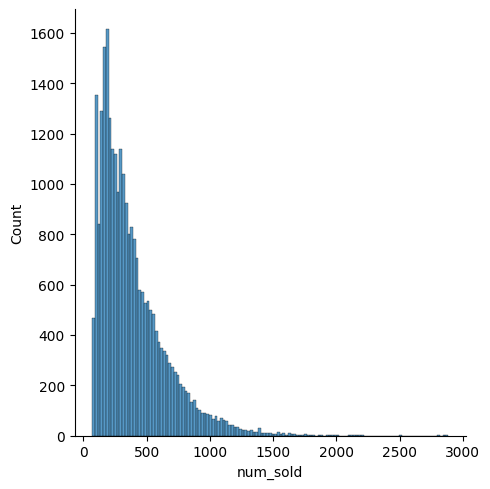

In [7]:
sns.displot(train['num_sold'])

In [8]:
#Check missing values
print('Number of null values in training set:',train.isnull().sum().sum())
print('Number of null values in test set:',test.isnull().sum().sum())

Number of null values in training set: 0
Number of null values in test set: 0


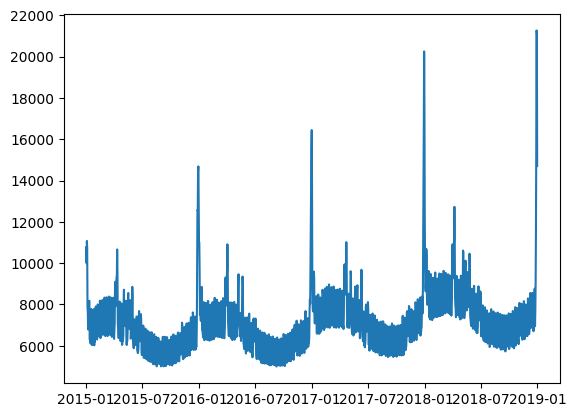

In [9]:
tplot = train.groupby(['date']).sum()
tplot = tplot.drop('row_id',axis=1)
tplot.index = pd.to_datetime(tplot.index)
plt.plot(tplot)
plt.show()

In [10]:
train.groupby(['country','store','product']).num_sold.agg(['min','max','mean'])

min   max         mean
country store      product                               
Finland KaggleMart Kaggle Hat      210  1113   362.479808
                   Kaggle Mug      126   774   204.200548
                   Kaggle Sticker   70   326   103.044490
        KaggleRama Kaggle Hat      354  1895   628.926762
                   Kaggle Mug      220  1398   356.110883
                   Kaggle Sticker  128   559   180.232033
Norway  KaggleMart Kaggle Hat      335  1809   594.645448
                   Kaggle Mug      201  1113   334.370294
                   Kaggle Sticker  114   518   169.577687
        KaggleRama Kaggle Hat      596  2884  1036.357974
                   Kaggle Mug      366  1935   584.297741
                   Kaggle Sticker  214   874   295.607803
Sweden  KaggleMart Kaggle Hat      248  1207   419.214237
                   Kaggle Mug      149   730   235.885010
                   Kaggle Sticker   86   356   119.613279
        KaggleRama Kaggle Hat      428  2169   731.452430
                   Kaggle Mug      253  1438   411.273101
                   Kaggle Sticker  148   637   208.314853

In [11]:
df_plot = train.groupby(['date','product']).num_sold.sum()
df_plot = pd.DataFrame(df_plot)
df_plot = df_plot.reset_index()
product_t = []
for i in train['product'].unique():
    df_plot_temp = df_plot.where(df_plot['product'] == i)
    df_plot_temp = df_plot_temp.dropna()
    df_plot_temp = df_plot_temp.drop(columns='product')
    df_plot_temp = df_plot_temp.set_index('date')
    product_t.append(df_plot_temp)
all_product = product_t[0]
all_product.rename(columns = {'num_sold':'mug'}, inplace = True)
all_product['hat'] = product_t[1]['num_sold']
all_product['sticker'] = product_t[2]['num_sold']

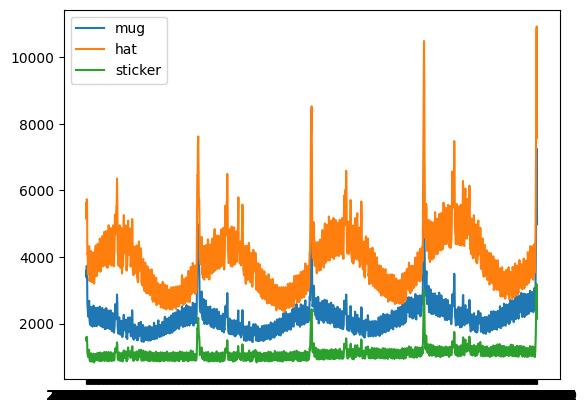

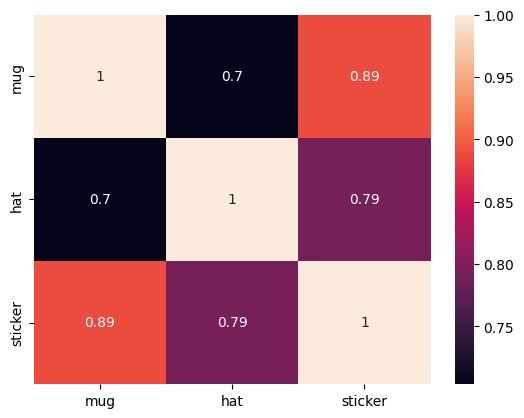

In [12]:
plt.plot(all_product,label = all_product.columns.values)
plt.legend(loc='upper left')
plt.show()
sns.heatmap(all_product.corr(),annot=all_product.corr())
plt.show()

In [13]:
Allt = []
for i in range(0,18):
    Allt.append(pd.DataFrame(columns=train.columns))

for i in range(0,len(train)):
    Allt[i % 18] = Allt[i % 18].append(train.iloc[i], ignore_index = True)

for i in Allt:
    namecol = list(i.iloc[0])[2]+'_'+list(i.iloc[0])[3]+'_'+list(i.iloc[0])[4]
    i.drop(columns=['row_id','country','store','product'], inplace = True)
    i.rename(columns = {'num_sold':namecol}, inplace = True)
    i.set_index("date", inplace = True)

Allt_corr = Allt[0]
for i in Allt:
    Allt_corr[i.columns[0]] = i[i.columns[0]].astype('int')

only_mug  = pd.DataFrame(Allt_corr['Finland_KaggleMart_Kaggle Mug'])
only_mug.drop(columns=['Finland_KaggleMart_Kaggle Mug'],inplace = True)
only_hat  = pd.DataFrame(Allt_corr['Finland_KaggleMart_Kaggle Mug'])
only_hat.drop(columns=['Finland_KaggleMart_Kaggle Mug'],inplace = True)
only_sticker  = pd.DataFrame(Allt_corr['Finland_KaggleMart_Kaggle Mug'])
only_sticker.drop(columns=['Finland_KaggleMart_Kaggle Mug'],inplace = True)


In [14]:
for i in Allt_corr.columns.values:
    if 'Mug' in i:
        only_mug[i] = Allt_corr[i]
    if 'Hat' in i:
        only_hat[i] = Allt_corr[i]  
    if 'Sticker' in i:
        only_sticker[i] = Allt_corr[i]

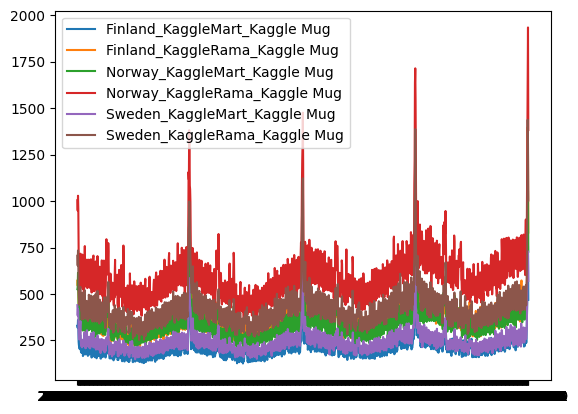

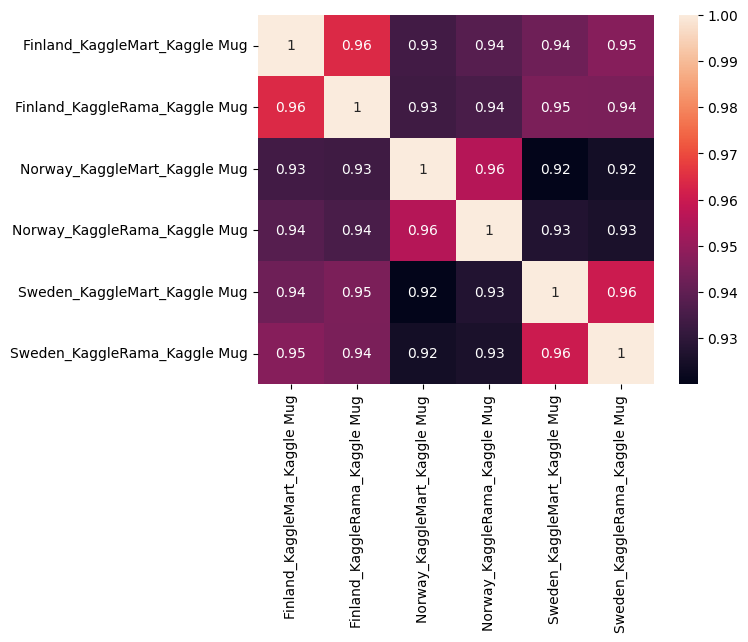

In [15]:
plt.plot(only_mug,label = only_mug.columns.values)
plt.legend(loc='upper left')
plt.show()
sns.heatmap(only_mug.corr(),annot=only_mug.corr())
plt.show()

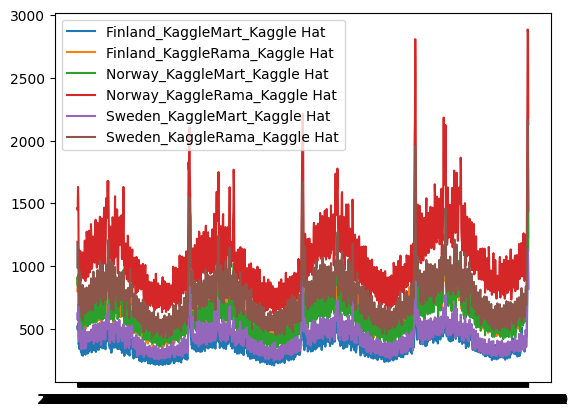

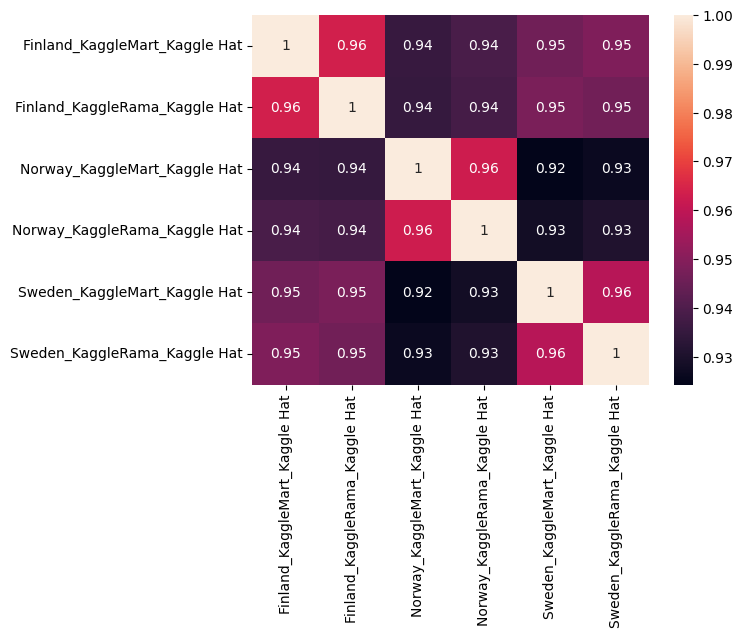

In [16]:
plt.plot(only_hat,label = only_hat.columns.values)
plt.legend(loc='upper left')
plt.show()
sns.heatmap(only_hat.corr(),annot=only_hat.corr())
plt.show()

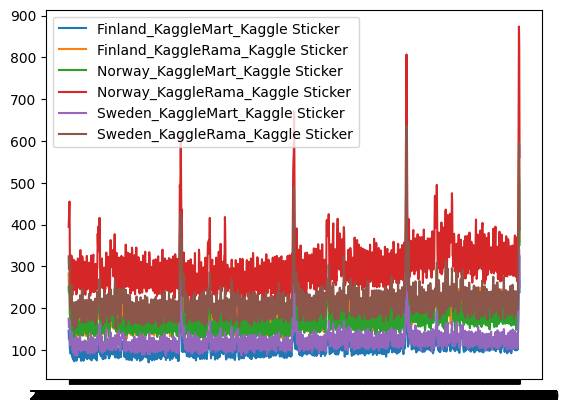

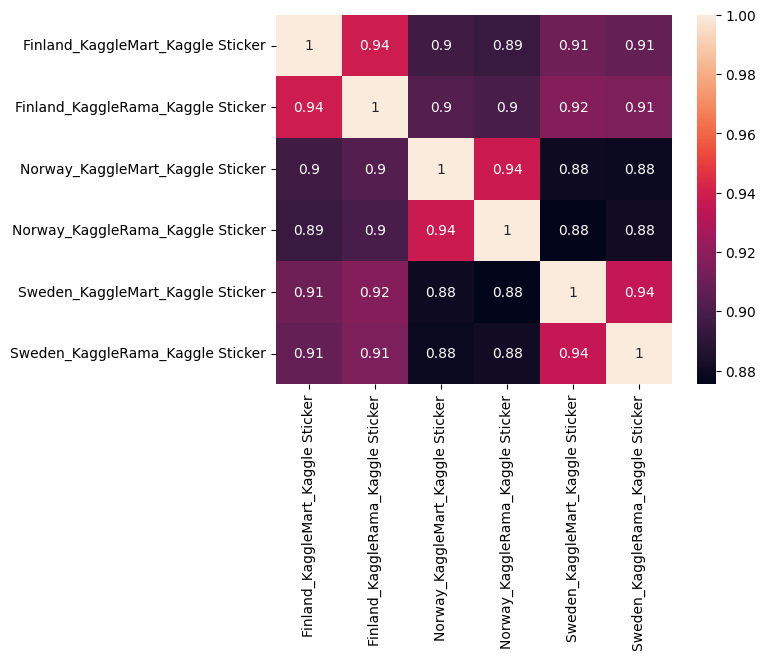

In [17]:
plt.plot(only_sticker,label = only_sticker.columns.values)
plt.legend(loc='upper left')
plt.show()
sns.heatmap(only_sticker.corr(),annot=only_sticker.corr())
plt.show()

In [18]:
store_mart = pd.DataFrame(columns=train.columns)
store_rama = pd.DataFrame(columns=train.columns)
n = 0
m = 0
for i in range(0,len(train)):
    if m == 3:
        n = 1
    if m == 0:
        n = 0
    if n == 0:
        store_mart = store_mart.append(train.iloc[i], ignore_index = True)
        m += 1
        continue
    if n == 1:
        store_rama = store_rama.append(train.iloc[i], ignore_index = True)
        m = m - 1
        continue

store_mart = store_mart.groupby('date').sum()
store_mart = store_mart['num_sold']
store_rama = store_rama.groupby('date').sum()
store_rama = store_rama['num_sold']
all_store = pd.DataFrame(store_mart)
all_store.rename(columns={'num_sold':'mart'},inplace=True)
all_store['rama'] = store_rama

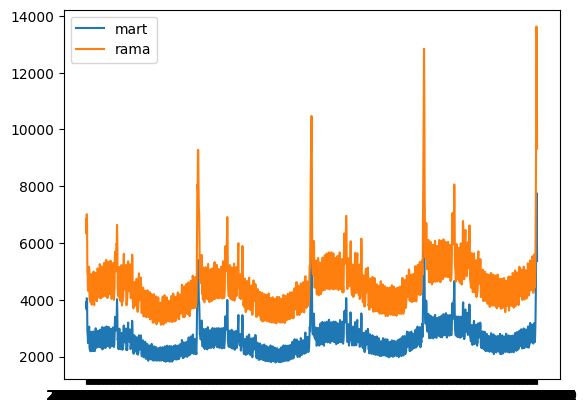

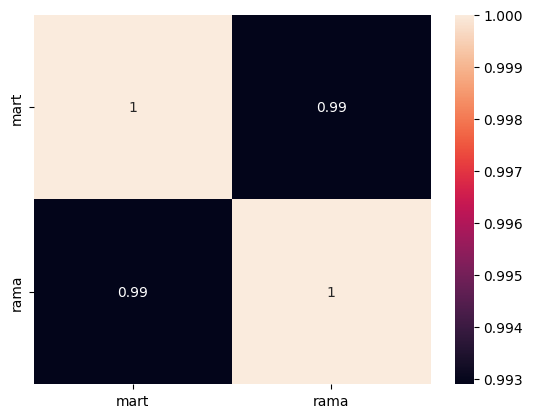

In [19]:
plt.plot(all_store,label = all_store.columns.values)
plt.legend(loc='upper left')
plt.show()
sns.heatmap(all_store.corr(),annot=all_store.corr())
plt.show()

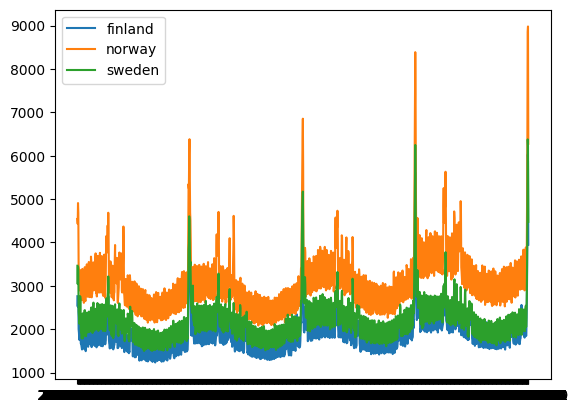

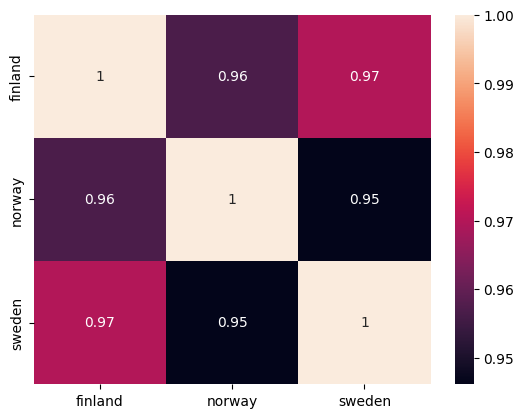

In [20]:
countrys = train.groupby(['date','country']).sum()
countrys = countrys['num_sold']
countrys = countrys.reset_index()

f_c = pd.DataFrame(columns=countrys.columns)
n_c = pd.DataFrame(columns=countrys.columns)
s_c = pd.DataFrame(columns=countrys.columns)
n = 0
for i in range(0,len(countrys)):
    if n == 0:
        f_c = f_c.append(countrys.iloc[i], ignore_index = True)
        n += 1
        continue
    if n == 1:
        n_c = n_c.append(countrys.iloc[i], ignore_index = True)
        n += 1
        continue
    if n == 2:
        s_c = s_c.append(countrys.iloc[i], ignore_index = True)
        n = 0

f_c.set_index("date", inplace = True)
f_c.drop(columns='country', inplace = True)
n_c.set_index("date", inplace = True)
n_c.drop(columns='country', inplace = True)
s_c.set_index("date", inplace = True)
s_c.drop(columns='country', inplace = True)

n_country = f_c
n_country.rename(columns = {'num_sold':'finland'}, inplace = True)
n_country['finland'] = n_country['finland'].astype('int')
n_country['norway'] = n_c['num_sold'].astype('int')
n_country['sweden'] = s_c['num_sold'].astype('int')
plt.plot(n_country,label = n_country.columns.values)
plt.legend(loc='upper left')
plt.show()
sns.heatmap(n_country.corr(),annot=n_country.corr())
plt.show()

## Kaggle Mug Exploring&Engineering

### Kaggle MUG - Exploring

In [21]:
only_mug['total'] = only_mug[only_mug.columns.values[0]]+only_mug[only_mug.columns.values[1]]+only_mug[only_mug.columns.values[2]]+only_mug[only_mug.columns.values[2]]+only_mug[only_mug.columns.values[4]]+only_mug[only_mug.columns.values[5]]

In [22]:
total_mug = only_mug['total']
total_mug = pd.DataFrame(total_mug)

total_mug['year'] = pd.DatetimeIndex(total_mug.index).year
total_mug['month'] = pd.DatetimeIndex(total_mug.index).month
total_mug['day_of_year'] = pd.DatetimeIndex(total_mug.index).day_of_year
total_mug['day_of_week'] = pd.DatetimeIndex(total_mug.index).weekday
total_mug['num_week'] = pd.DatetimeIndex(total_mug.index).weekofyear
total_mug['day_of_month'] = pd.DatetimeIndex(total_mug.index).day

year = list(total_mug['year'].unique())

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_5816\2586379331.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_mug['total'])


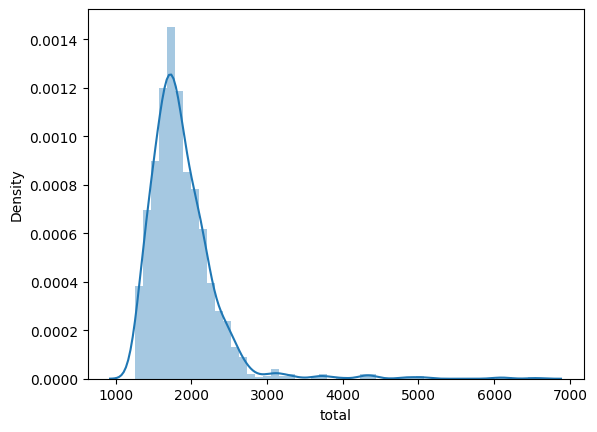

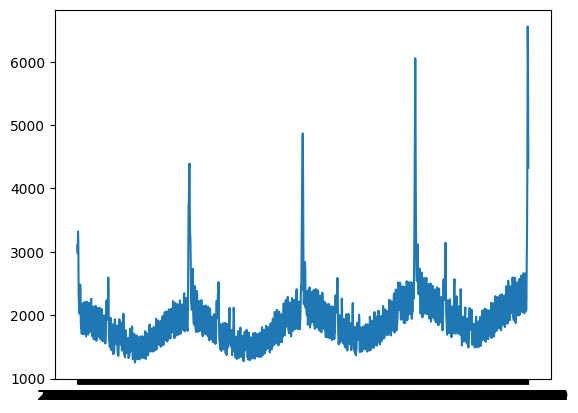

In [23]:
sns.distplot(total_mug['total'])
plt.show()
plt.plot(total_mug['total'])
plt.show()

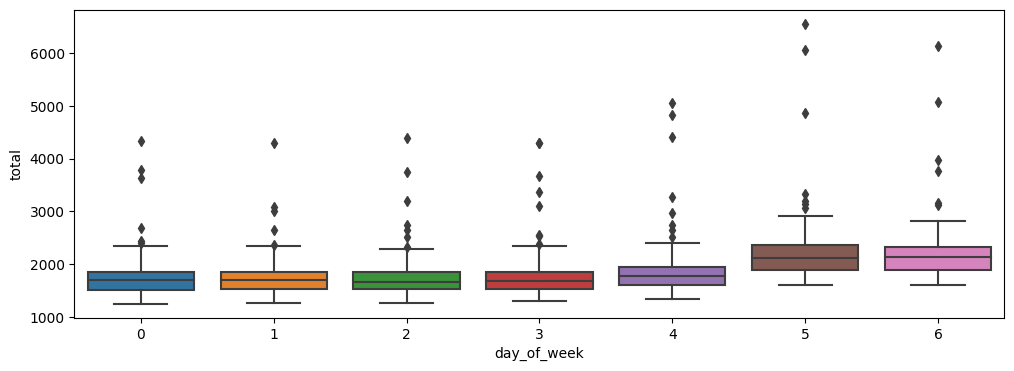

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(data =total_mug , x='day_of_week',y='total',ax=ax)
plt.show()

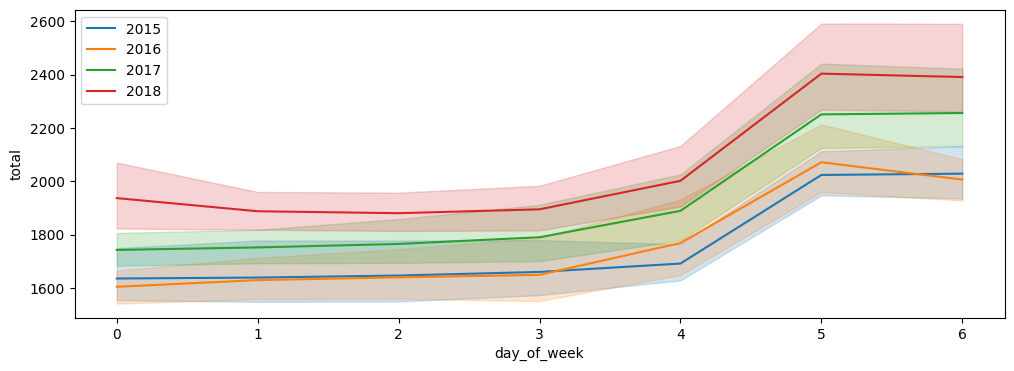

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
df_plot = pd.DataFrame()
for i in year:
    df_plot = total_mug.where(total_mug['year'] == i).dropna()
    sns.lineplot(data = df_plot,x='day_of_week',y='total',ax=ax,label=i,legend='auto')
plt.show()

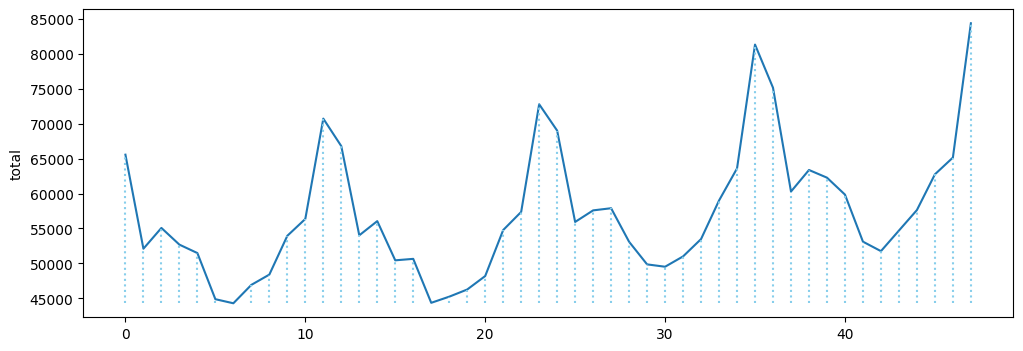

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
df_plot = total_mug.drop(columns=['day_of_week','num_week','day_of_year','day_of_month'])
df_plot = df_plot.groupby(['month','year']).sum()
df_plot = df_plot.reset_index()
df_plot = df_plot.sort_values(by=['year','month'])
df_plot = df_plot.reset_index(drop=True)
sns.lineplot(data =df_plot , x=df_plot.index,y='total',ax=ax)
for x, y in zip(df_plot.index, df_plot['total']):
    plt.plot([x, x], [min(df_plot['total']), y], linestyle=':',color='skyblue')
plt.show()

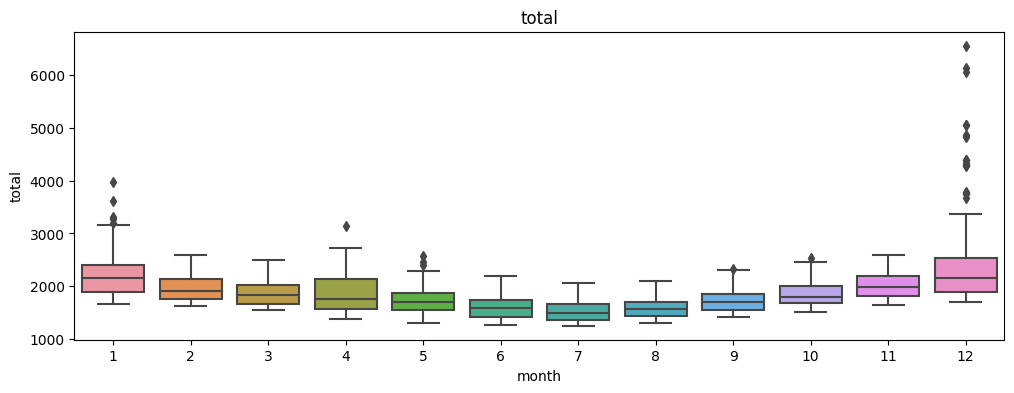

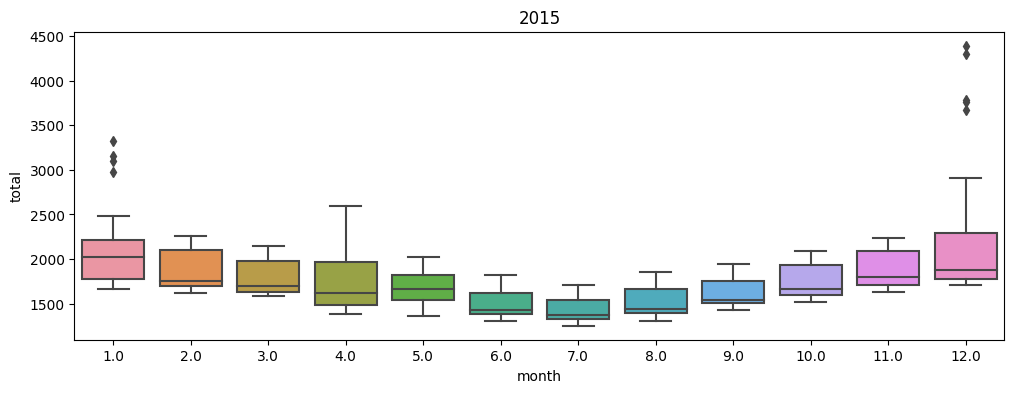

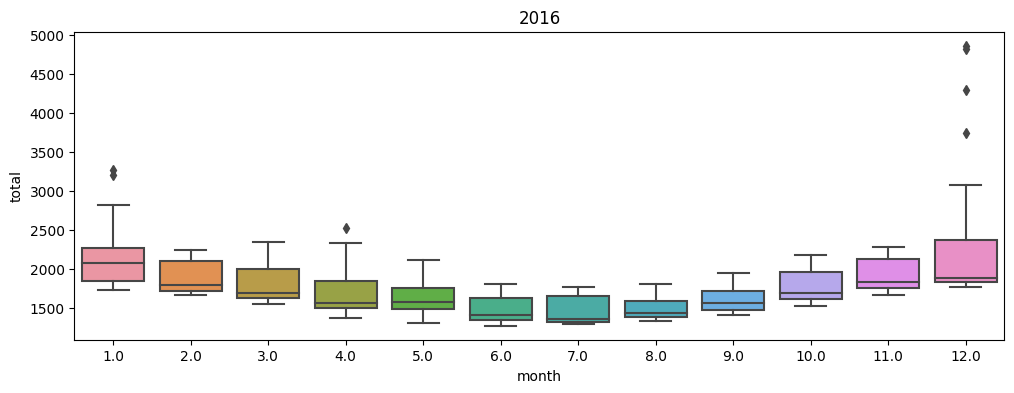

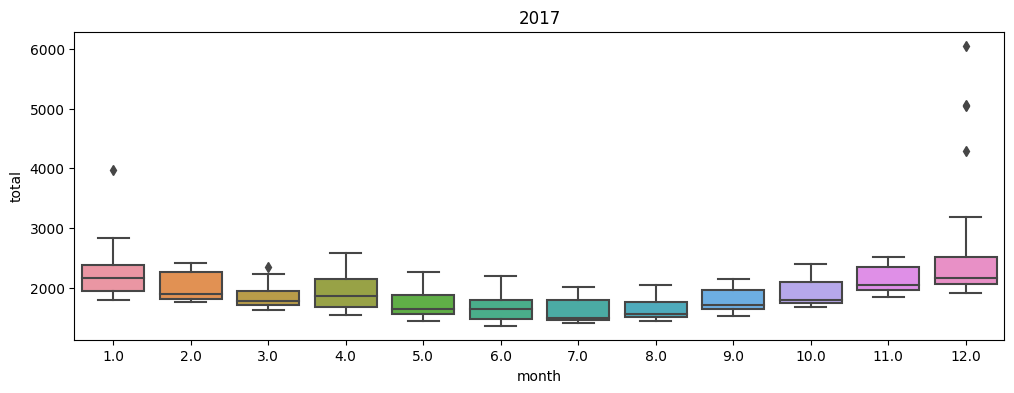

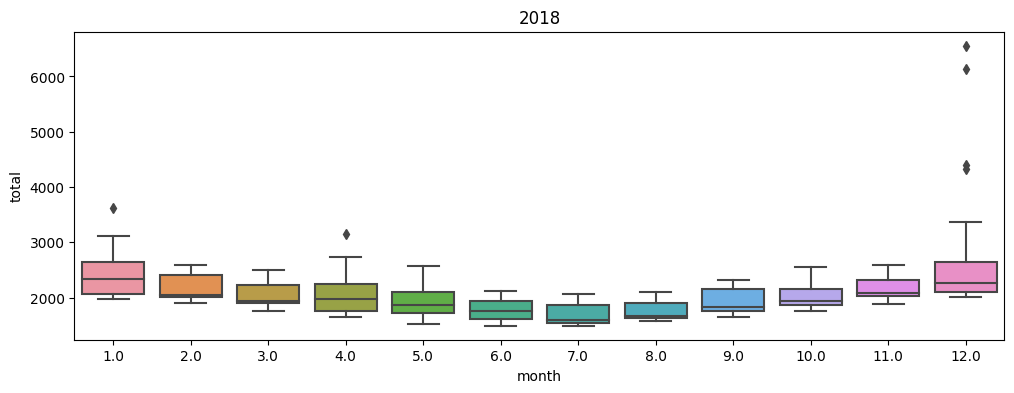

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(data=total_mug,x='month',y='total',ax=ax)
plt.title('total')
plt.show()
for i in year:
    fig, ax = plt.subplots()
    fig.set_size_inches((12,4))
    df_plot = total_mug.where(total_mug['year'] == i).dropna()
    sns.boxplot(data=df_plot,x='month',y='total',ax=ax)
    plt.title(i)
    plt.show()

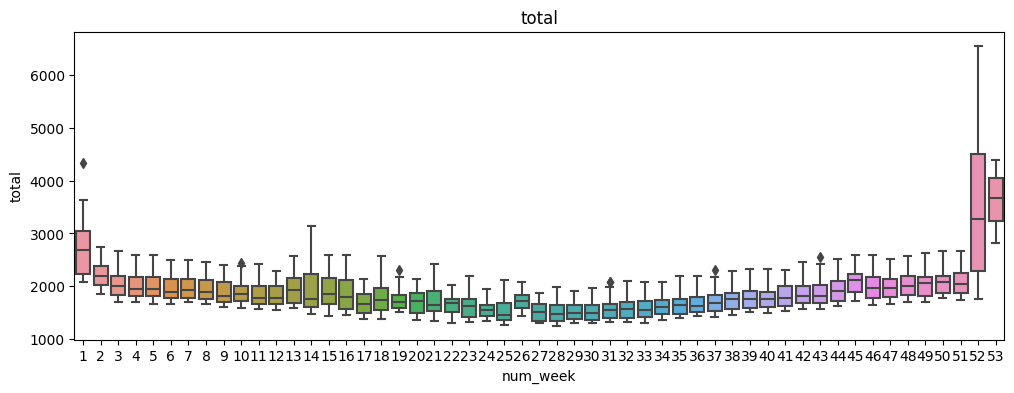

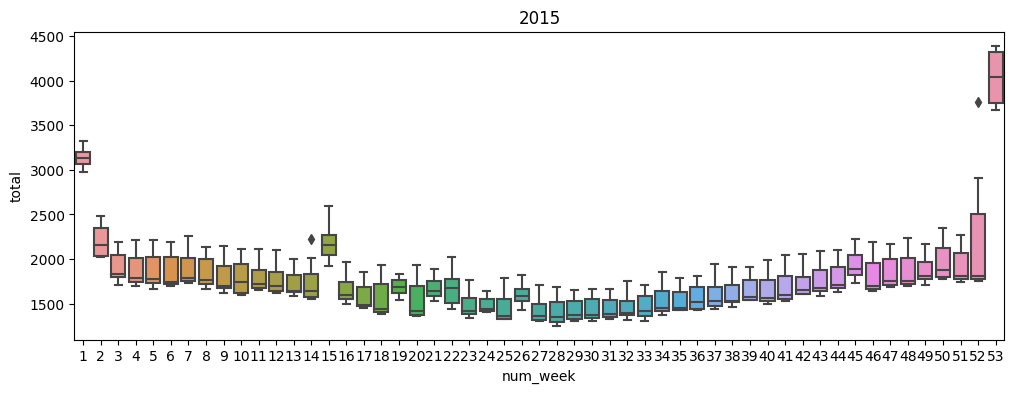

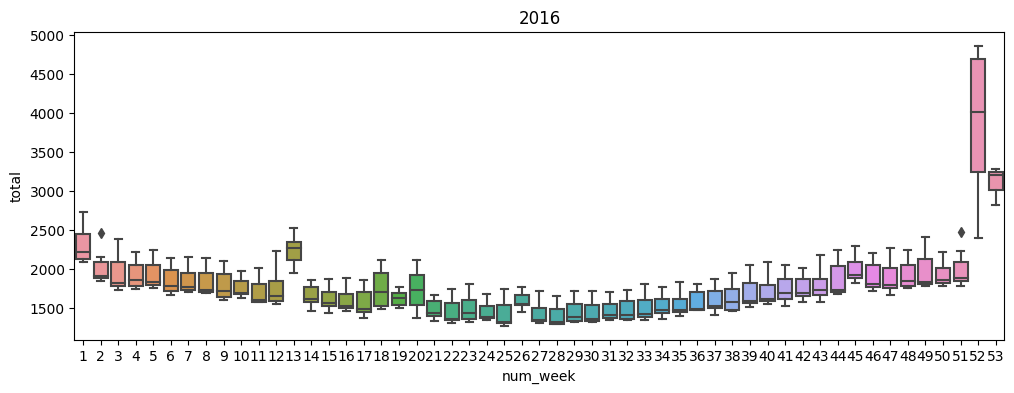

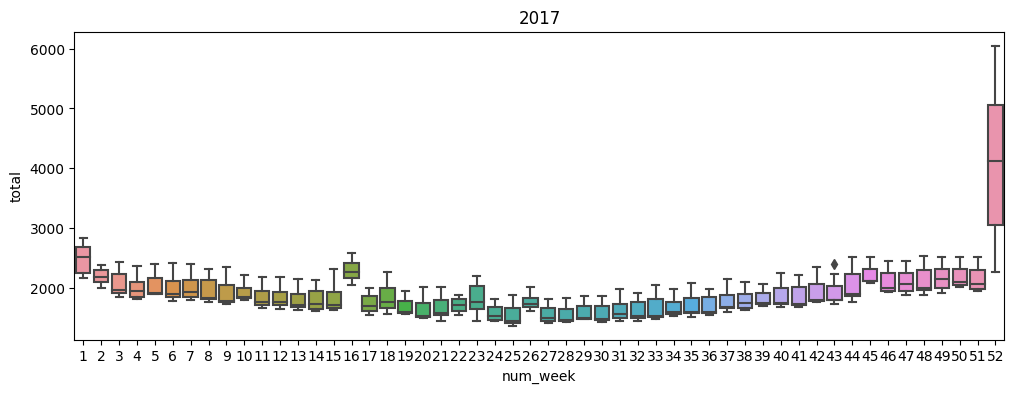

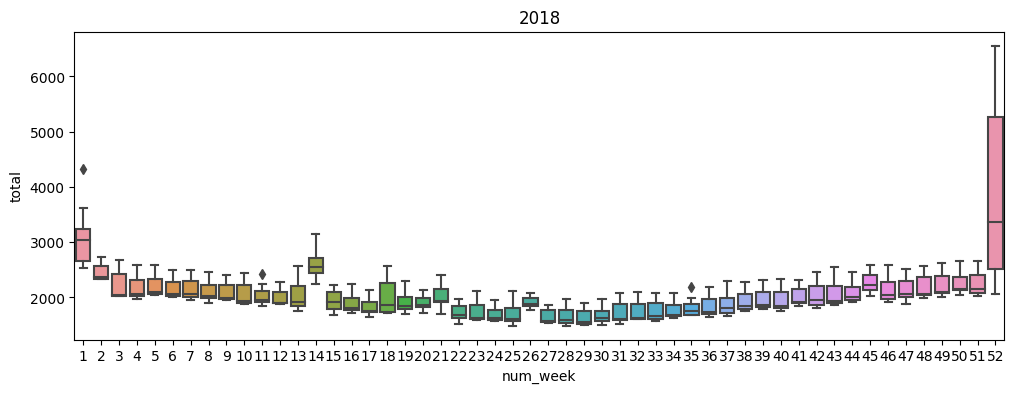

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(data =total_mug , x='num_week',y='total',ax=ax)
plt.title('total')
plt.show()
for i in year:
    fig, ax = plt.subplots()
    fig.set_size_inches((12,4))
    df_plot = total_mug.where(total_mug['year'] == i).dropna()
    df_plot['num_week'] = df_plot['num_week'].astype('int')
    sns.boxplot(data=df_plot,x='num_week',y='total',ax=ax)
    plt.title(i)
    plt.show()

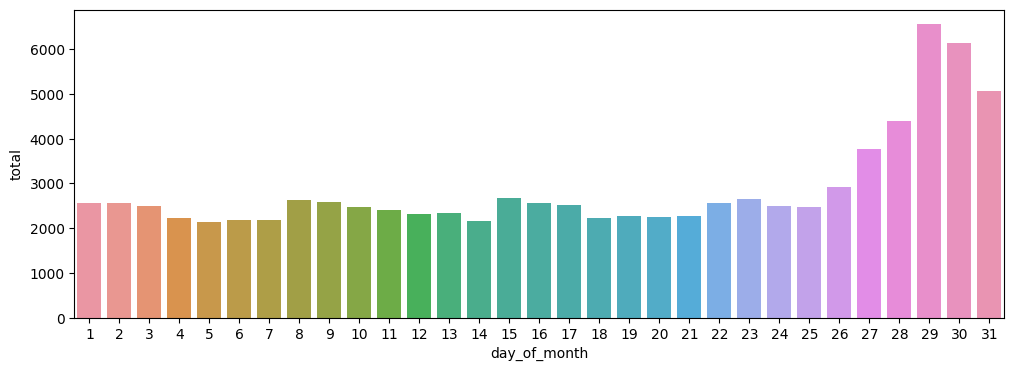

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
for i in year:
    df_plot = total_mug[ (total_mug['month']==12)]
    df_plot = df_plot.where(total_mug['year'] == i).dropna()
    df_plot['day_of_month'] = df_plot['day_of_month'].astype('int')
    sns.barplot(data = df_plot,x='day_of_month',y='total',ax=ax,label=i)
#for i in total_mug.where(total_mug['day_of_month'] == 1).dropna()['day_of_year']:
    #plt.axvline(x=i, color='black', linestyle='-')
#for x, y in zip(df_plot['num_week'], df_plot['total']):
    #plt.plot([x, x], [min(df_plot['total']), y], 'k-', lw=1)
plt.show()

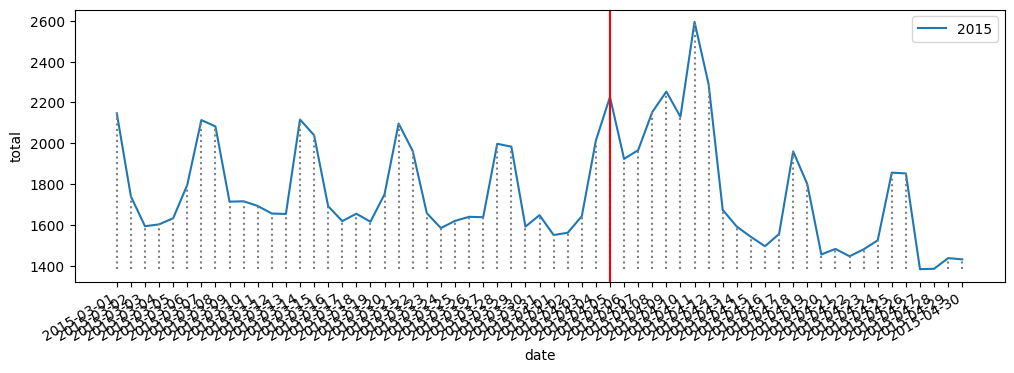

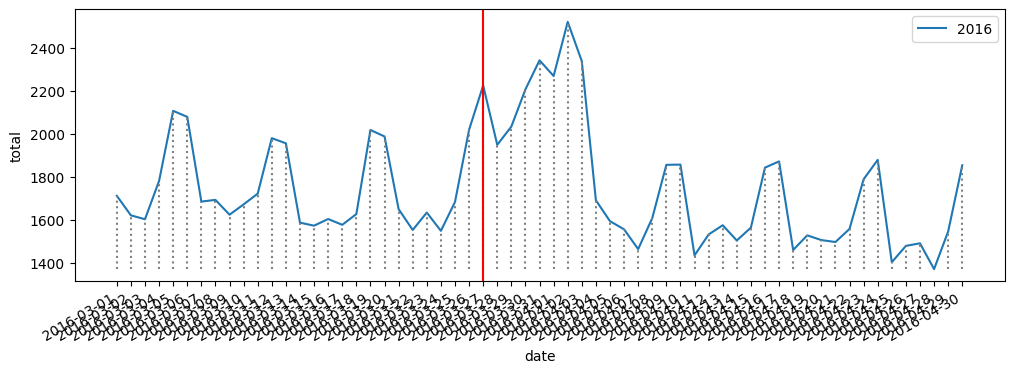

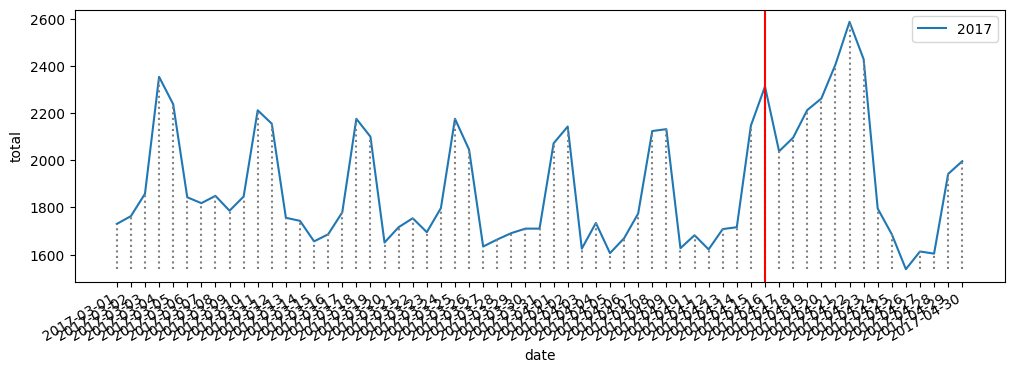

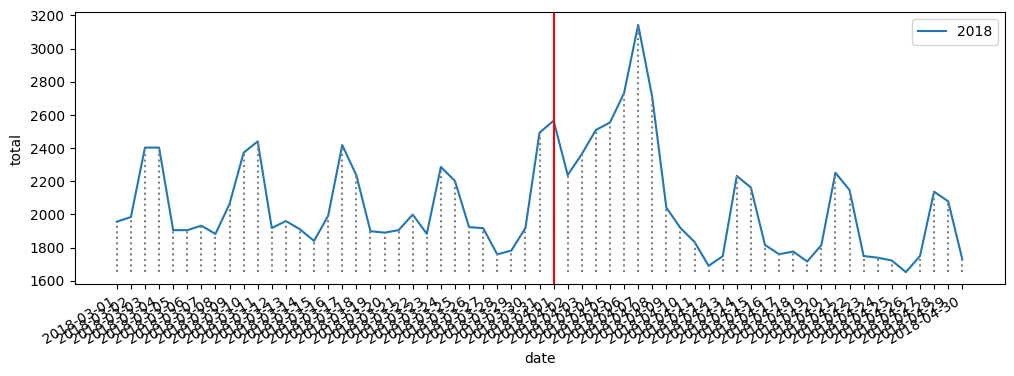

In [32]:
easterday = ['2015-04-05','2016-03-27','2017-04-16','2018-04-01']
for i in year:
    fig, ax = plt.subplots()
    fig.set_size_inches((12,4))
    df_plot = total_mug.where(total_mug['year'] == i).dropna()
    df_plot = df_plot.where((df_plot['month']>2)&(df_plot['month']<5)).dropna()
    sns.lineplot(data = df_plot,x='date',y='total',ax=ax,label=i,legend='auto')
    fig.autofmt_xdate()
    for k,l in zip(df_plot.index.values,df_plot['total'].values):
        plt.vlines(x = k,ymax=l,ymin=np.min(df_plot['total'].values), color = 'gray',linestyles='dotted')
    plt.axvline(x=easterday[year.index(i)],color='red')
    plt.show()

### Kaggle MUG - Engineer

In [33]:
only_mug['year'] = pd.DatetimeIndex(total_mug.index).year
only_mug['month'] = pd.DatetimeIndex(total_mug.index).month
only_mug['day_of_week'] = pd.DatetimeIndex(total_mug.index).weekday
only_mug['num_week'] = pd.DatetimeIndex(total_mug.index).weekofyear

only_mug['is_weekend'] = only_mug['day_of_week'] > 4
only_mug['is_weekend'] = only_mug['is_weekend']*1
only_mug['is_ny'] = (only_mug['num_week'] == 52) | (only_mug['num_week'] == 1)
only_mug['is_ny'] = only_mug['is_ny']*1
only_mug['easterday'] = only_mug.index.isin(easterday)
only_mug['easterday'] = only_mug['easterday']*1

week_after_easter = []
for i in range(0,1461):
    if only_mug.iloc[i]['year'] == 2015 and  only_mug.iloc[i]['num_week'] == 15:
        week_after_easter.append(1)
    elif only_mug.iloc[i]['year'] == 2016 and  only_mug.iloc[i]['num_week'] == 13:
        week_after_easter.append(1)
    elif only_mug.iloc[i]['year'] == 2017 and  only_mug.iloc[i]['num_week'] == 16:
        week_after_easter.append(1)
    elif only_mug.iloc[i]['year'] == 2018 and  only_mug.iloc[i]['num_week'] == 14:
        week_after_easter.append(1)
    else:
        week_after_easter.append(0)

only_mug['week_after_easter'] = np.array(week_after_easter)

In [34]:
only_mug.drop(columns='total',inplace=True)

Finland_KaggleMart_Kaggle Mug  Finland_KaggleRama_Kaggle Mug  \
date                                                                       
2015-01-01                            329                            572   
2015-01-02                            318                            544   
2015-01-03                            360                            579   
2015-01-04                            332                            582   
2015-01-05                            243                            423   
...                                   ...                            ...   
2018-12-27                            414                            652   
2018-12-28                            499                            895   
2018-12-29                            774                           1398   
2018-12-30                            757                           1241   
2018-12-31                            469                            831   

            Norway_KaggleMart_Kaggle Mug  Norway_KaggleRama_Kaggle Mug  \
date                                                                     
2015-01-01                           526                          1005   
2015-01-02                           538                           949   
2015-01-03                           614                          1029   
2015-01-04                           589                           957   
2015-01-05                           435                           739   
...                                  ...                           ...   
2018-12-27                           568                          1108   
2018-12-28                           731                          1333   
2018-12-29                          1113                          1816   
2018-12-30                          1052                          1935   
2018-12-31                           728                          1383   

            Sweden_KaggleMart_Kaggle Mug  Sweden_KaggleRama_Kaggle Mug  total  \
date                                                                            
2015-01-01                           440                           706   3099   
2015-01-02                           384                           653   2975   
2015-01-03                           420                           734   3321   
2015-01-04                           406                           657   3155   
2015-01-05                           298                           512   2346   
...                                  ...                           ...    ...   
2018-12-27                           420                           745   3367   
2018-12-28                           555                           990   4401   
2018-12-29                           720                          1438   6556   
2018-12-30                           730                          1303   6135   
2018-12-31                           570                          1004   4330   

            year  month  day_of_week  num_week  is_weekend  is_ny  easterday  \
date                                                                           
2015-01-01  2015      1            3         1           0      1          0   
2015-01-02  2015      1            4         1           0      1          0   
2015-01-03  2015      1            5         1           1      1          0   
2015-01-04  2015      1            6         1           1      1          0   
2015-01-05  2015      1            0         2           0      0          0   
...          ...    ...          ...       ...         ...    ...        ...   
2018-12-27  2018     12            3        52           0      1          0   
2018-12-28  2018     12            4        52           0      1          0   
2018-12-29  2018     12            5        52           1      1          0   
2018-12-30  2018     12            6        52           1      1          0   
2018-12-31  2018     12            0         1

## Kaggle Hat Exploring&Engineering

### Kaggle Hat - Exploring

In [35]:
only_hat['total'] = 0
for i in range(0,6):
    only_hat['total'] += only_hat[only_hat.columns.values[i]]

total_hat = only_hat['total']
total_hat = pd.DataFrame(total_hat)

total_hat['year'] = pd.DatetimeIndex(total_hat.index).year
total_hat['month'] = pd.DatetimeIndex(total_hat.index).month
total_hat['day_of_year'] = pd.DatetimeIndex(total_hat.index).day_of_year
total_hat['day_of_week'] = pd.DatetimeIndex(total_hat.index).weekday
total_hat['num_week'] = pd.DatetimeIndex(total_hat.index).weekofyear
total_hat['day_of_month'] = pd.DatetimeIndex(total_hat.index).day

df_plot_main = total_hat 

year = list(df_plot_main['year'].unique())

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_5816\335878776.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot_main['total'])


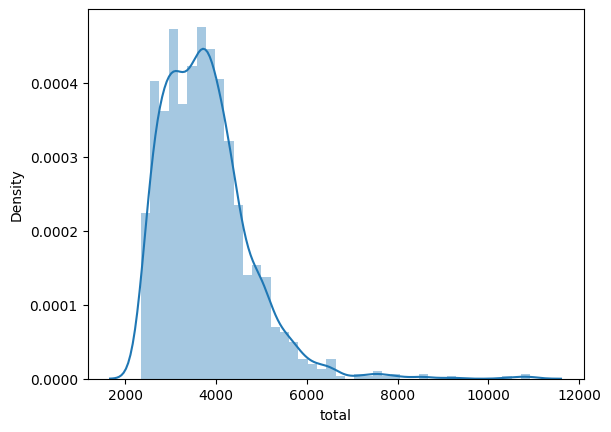

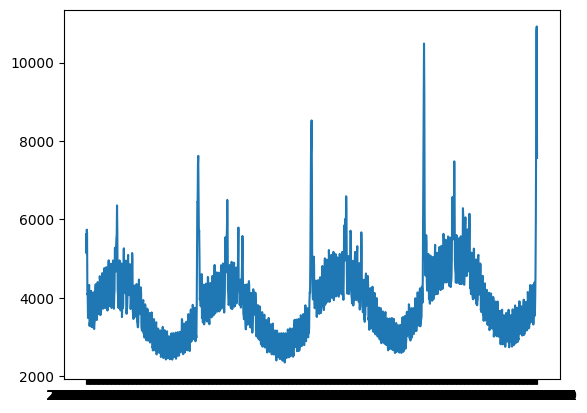

In [36]:
sns.distplot(df_plot_main['total'])
plt.show()
plt.plot(df_plot_main['total'])
plt.show()

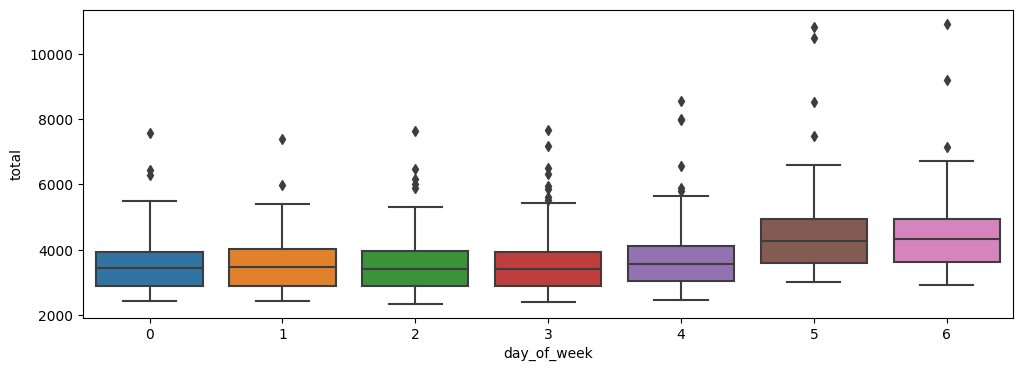

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(data =df_plot_main , x='day_of_week',y='total',ax=ax)
plt.show()

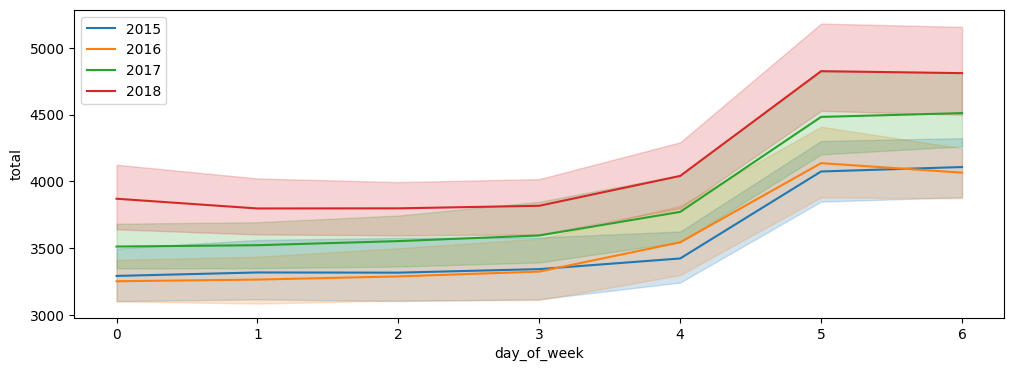

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
df_plot = pd.DataFrame()
for i in year:
    df_plot = df_plot_main.where(df_plot_main['year'] == i).dropna()
    sns.lineplot(data = df_plot,x='day_of_week',y='total',ax=ax,label=i,legend='auto')
plt.show()

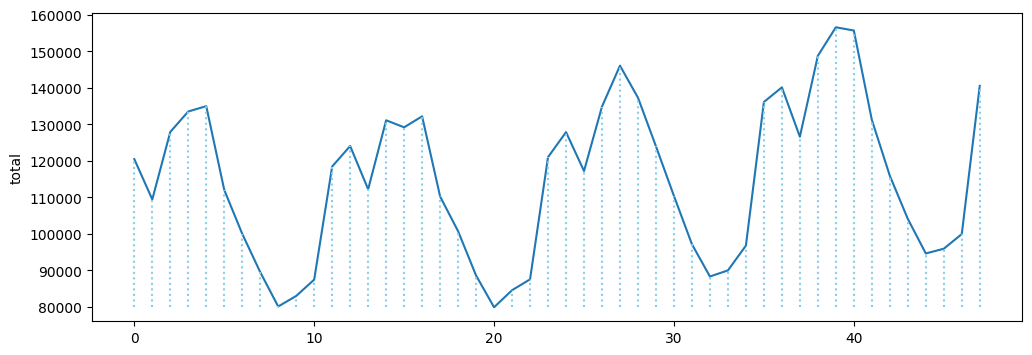

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
df_plot = df_plot_main.drop(columns=['day_of_week','num_week','day_of_year','day_of_month'])
df_plot = df_plot.groupby(['month','year']).sum()
df_plot = df_plot.reset_index()
df_plot = df_plot.sort_values(by=['year','month'])
df_plot = df_plot.reset_index(drop=True)
sns.lineplot(data =df_plot , x=df_plot.index,y='total',ax=ax)
for x, y in zip(df_plot.index, df_plot['total']):
    plt.plot([x, x], [min(df_plot['total']), y], linestyle=':',color='skyblue')
plt.show()

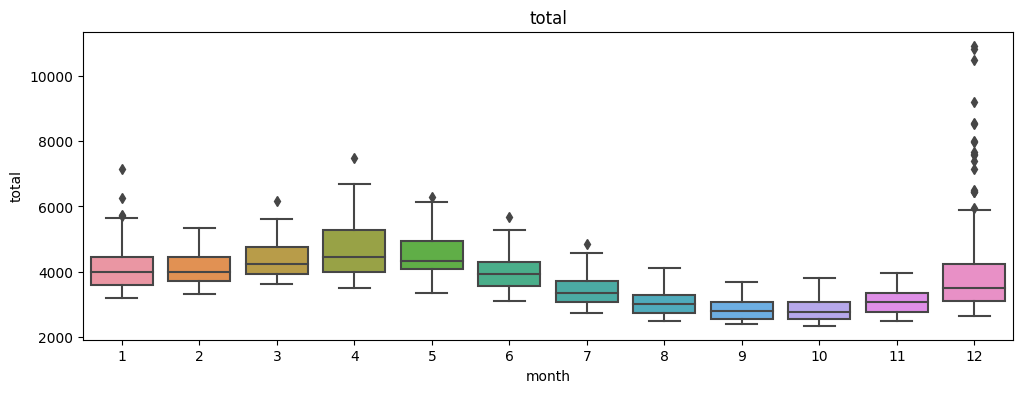

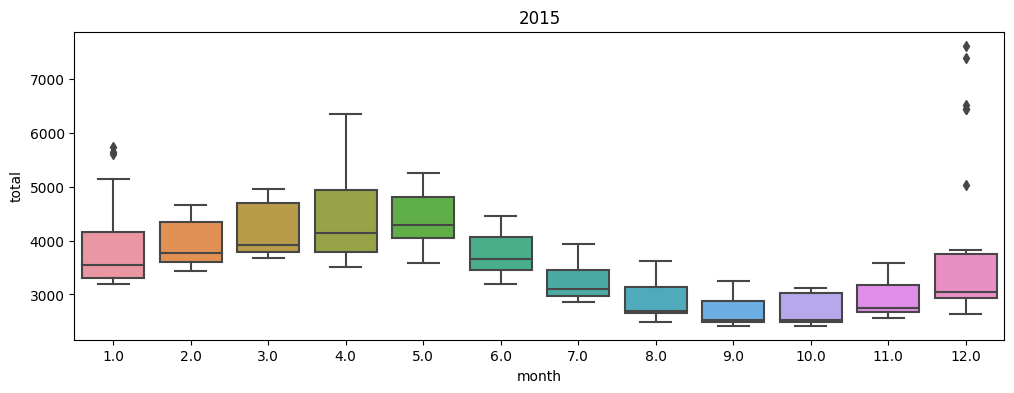

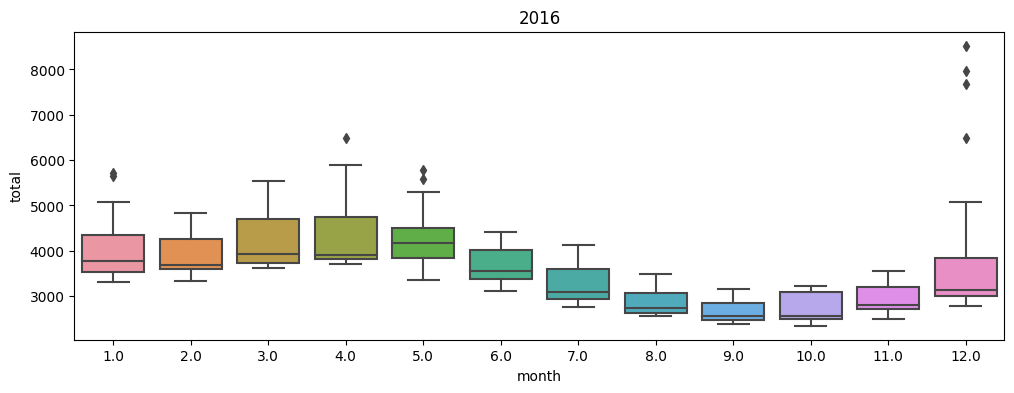

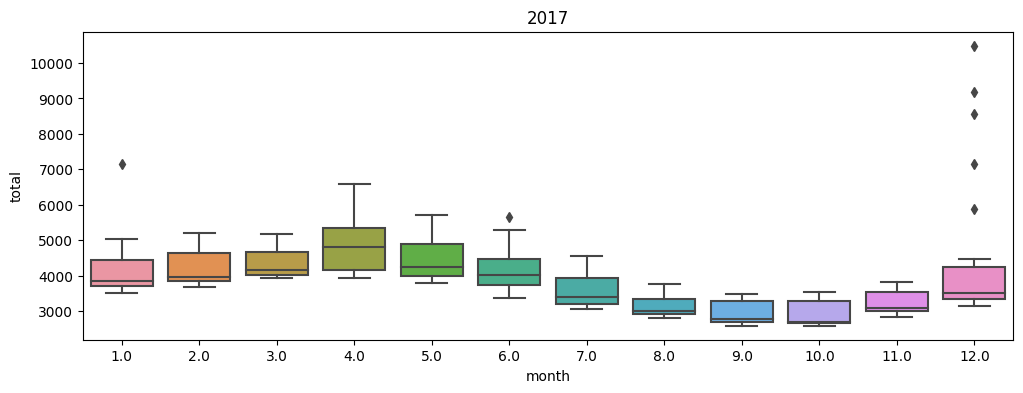

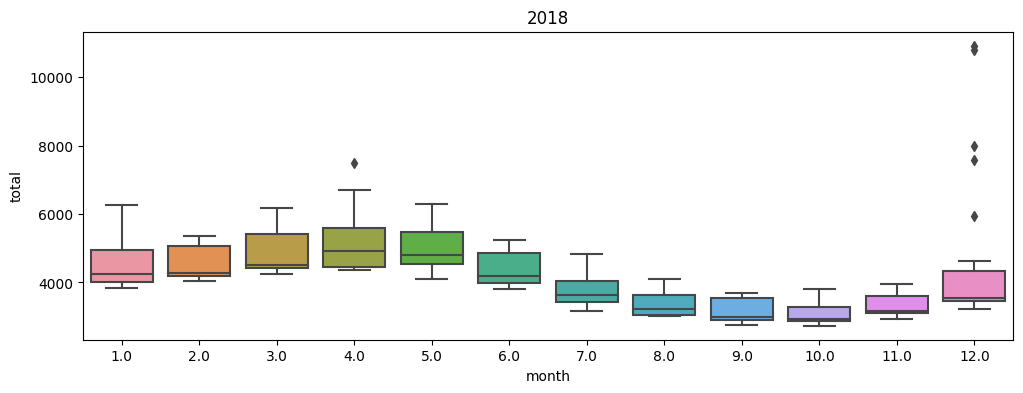

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(data=df_plot_main,x='month',y='total',ax=ax)
plt.title('total')
plt.show()
for i in year:
    fig, ax = plt.subplots()
    fig.set_size_inches((12,4))
    df_plot = df_plot_main.where(df_plot_main['year'] == i).dropna()
    sns.boxplot(data=df_plot,x='month',y='total',ax=ax)
    plt.title(i)
    plt.show()

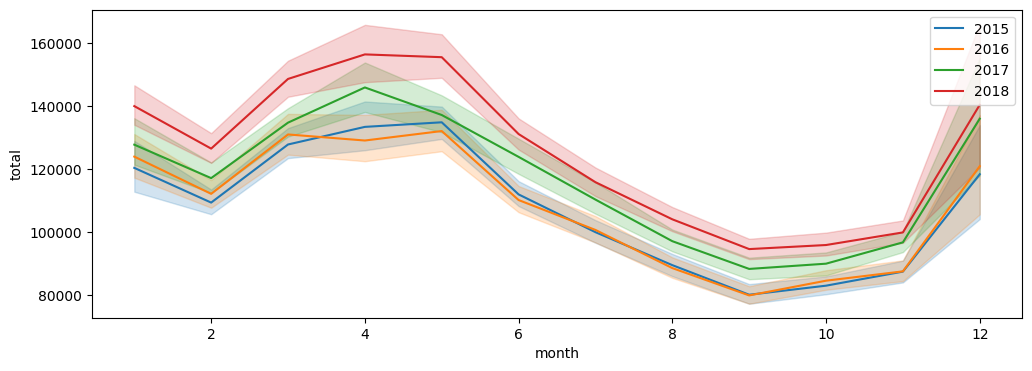

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
for i in year:
    df_plot = df_plot_main.where(df_plot_main['year'] == i).dropna()
    sns.lineplot(data = df_plot,x='month',y='total',ax=ax,label=i,legend='auto',estimator='sum')
plt.show()

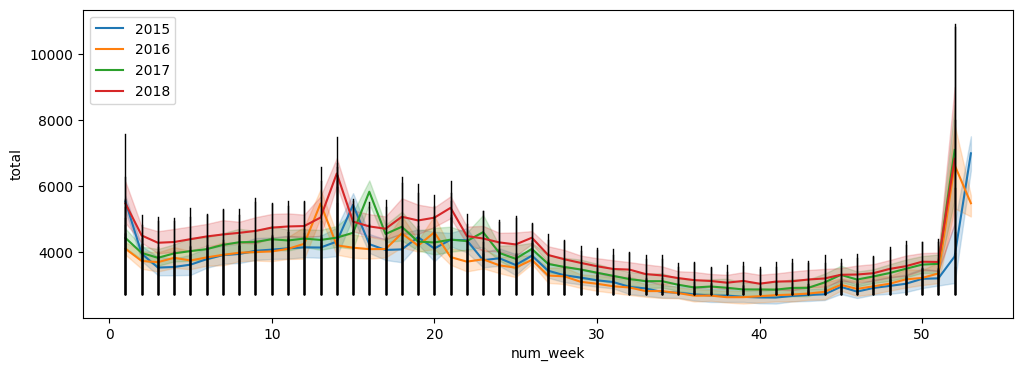

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
for i in year:
    #df_plot = df_plot_main[ (df_plot_main['month']>=2) & (df_plot_main['month']<=5) ]
    df_plot = df_plot_main.where(df_plot_main['year'] == i).dropna()
    sns.lineplot(data = df_plot,x='num_week',y='total',ax=ax,label=i,legend='auto')
#for i in df_plot_main.where(df_plot_main['day_of_month'] == 1).dropna()['day_of_year']:
    #plt.axvline(x=i, color='black', linestyle='-')
for x, y in zip(df_plot['num_week'], df_plot['total']):
    plt.plot([x, x], [min(df_plot['total']), y], 'k-', lw=1)
plt.show()

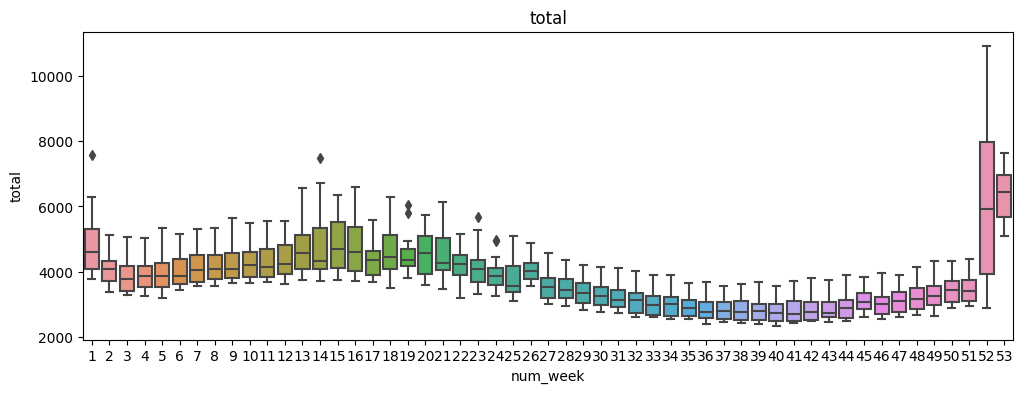

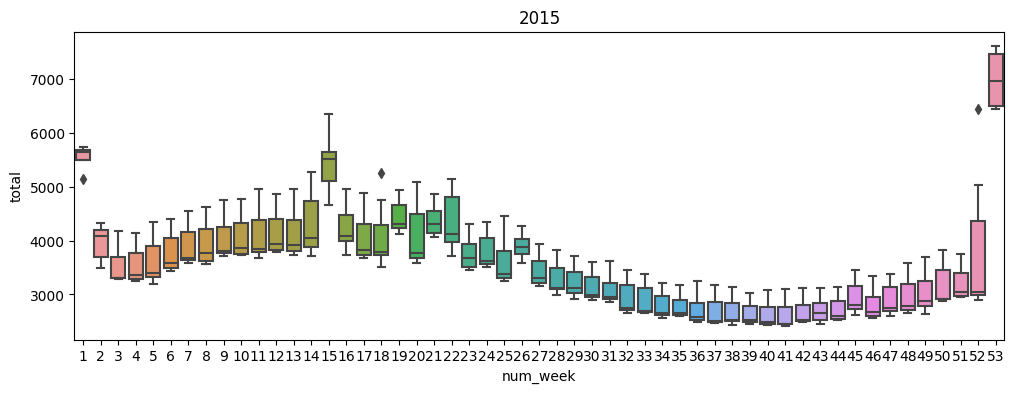

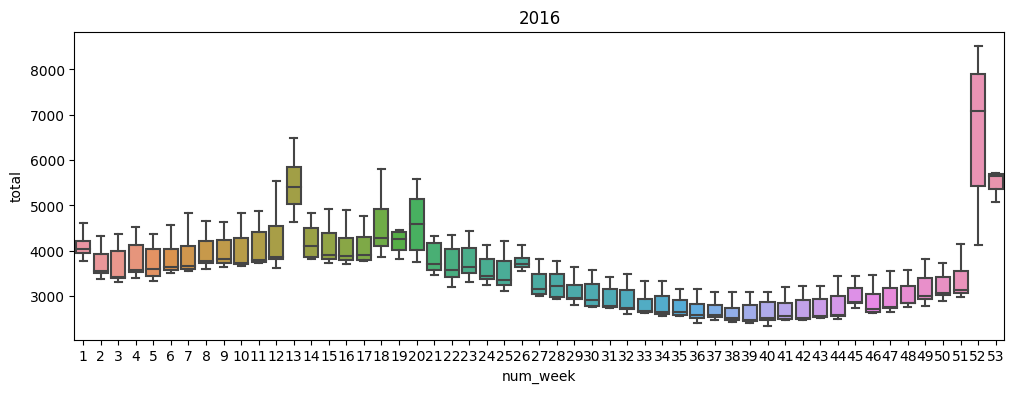

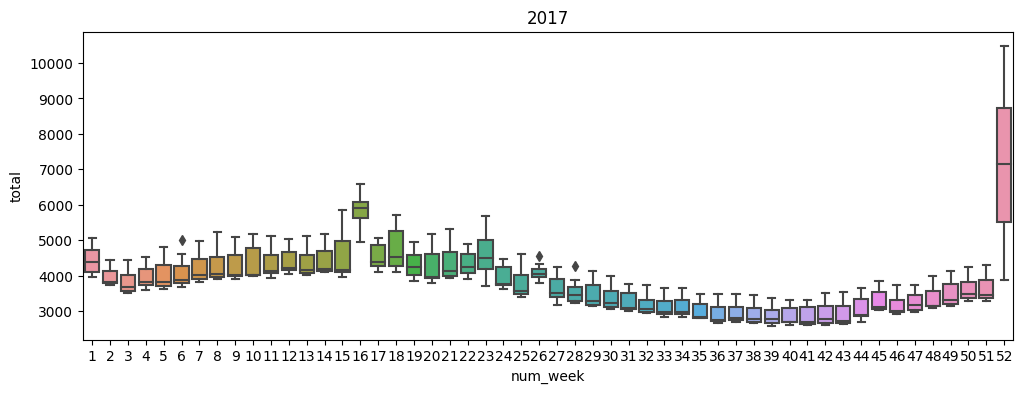

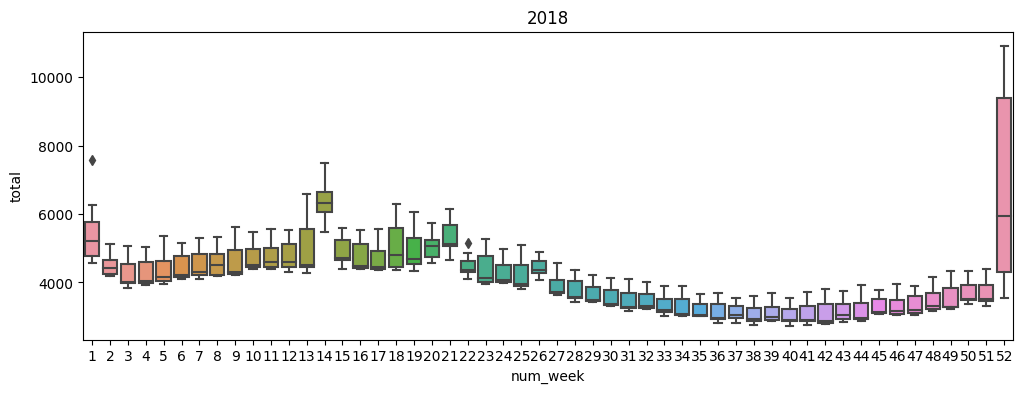

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(data =df_plot_main , x='num_week',y='total',ax=ax)
plt.title('total')
plt.show()
for i in year:
    fig, ax = plt.subplots()
    fig.set_size_inches((12,4))
    df_plot = df_plot_main.where(df_plot_main['year'] == i).dropna()
    df_plot['num_week'] = df_plot['num_week'].astype('int')
    sns.boxplot(data=df_plot,x='num_week',y='total',ax=ax)
    plt.title(i)
    plt.show()

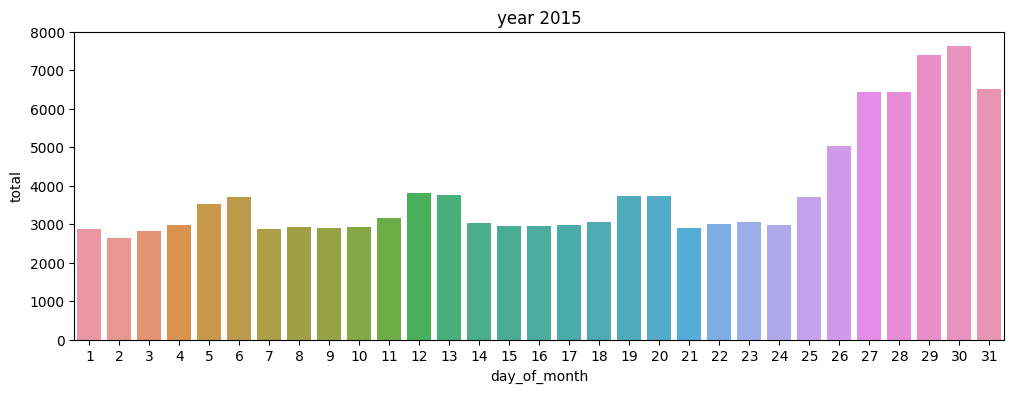

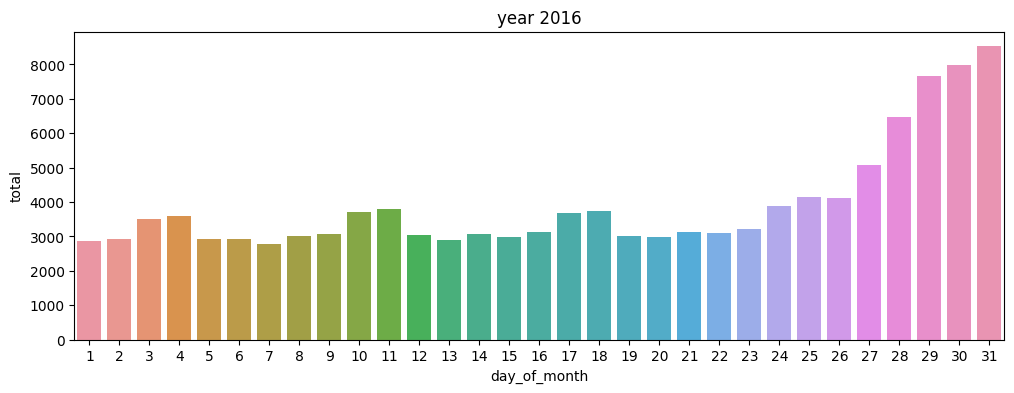

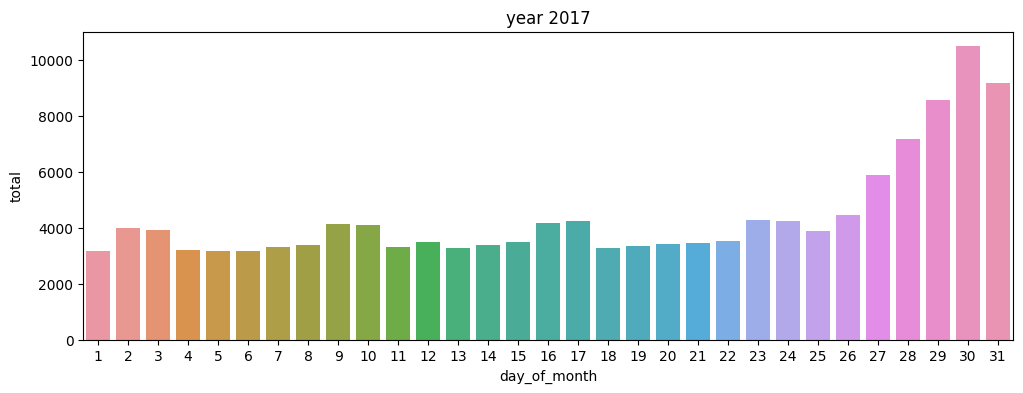

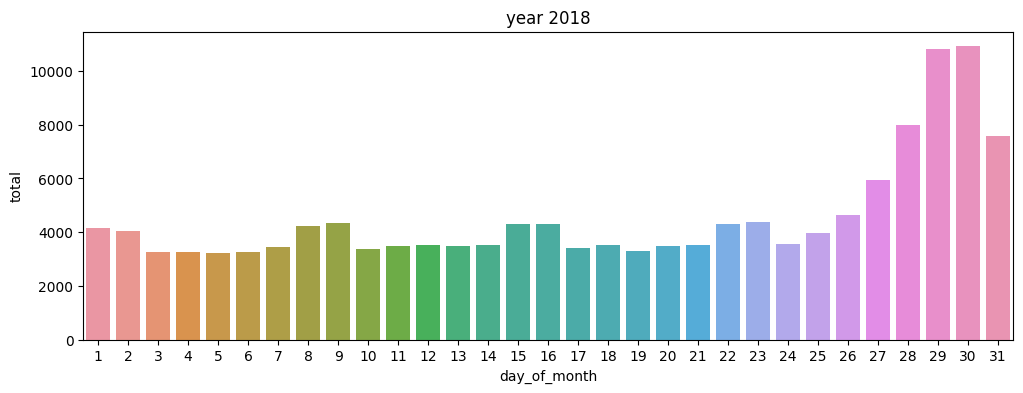

In [44]:
for i in year:
    fig, ax = plt.subplots()
    fig.set_size_inches((12,4))
    df_plot = pd.DataFrame()
    df_plot = df_plot_main[ (df_plot_main['month']==12)]
    df_plot = df_plot.where(df_plot['year'] == i).dropna()
    df_plot['day_of_month'] = df_plot['day_of_month'].astype('int')
    sns.barplot(data = df_plot,x='day_of_month',y='total',ax=ax,label=i)
    plt.title('year '+str(i))
    plt.show()
#for i in df_plot_main.where(df_plot_main['day_of_month'] == 1).dropna()['day_of_year']:
    #plt.axvline(x=i, color='black', linestyle='-')
#for x, y in zip(df_plot['num_week'], df_plot['total']):
    #plt.plot([x, x], [min(df_plot['total']), y], 'k-', lw=1)

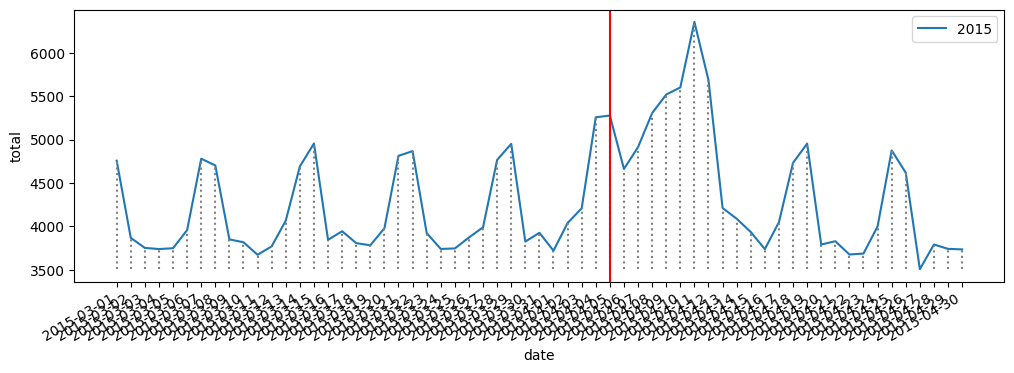

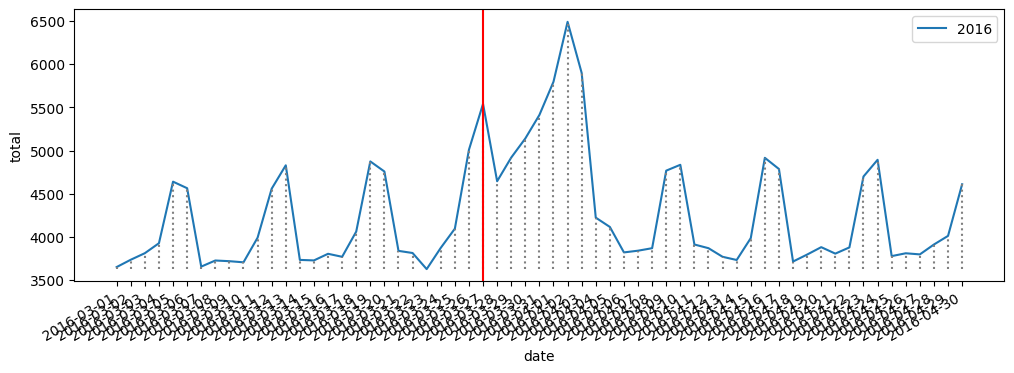

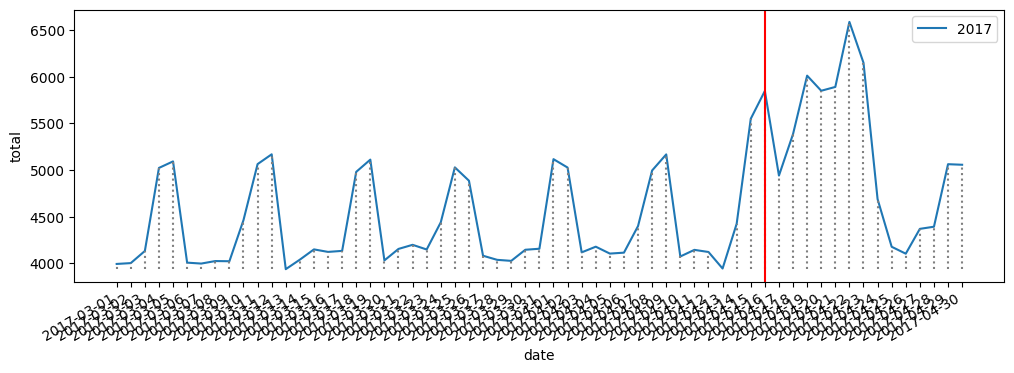

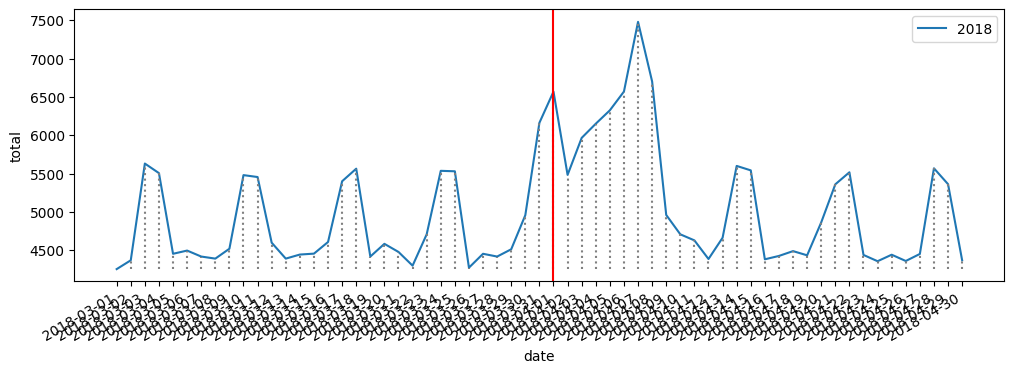

In [45]:
easterday = ['2015-04-05','2016-03-27','2017-04-16','2018-04-01']

for i in year:
    fig, ax = plt.subplots()
    fig.set_size_inches((12,4))
    df_plot = df_plot_main.where(df_plot_main['year'] == i).dropna()
    df_plot = df_plot.where((df_plot['month']>2)&(df_plot['month']<5)).dropna()
    sns.lineplot(data = df_plot,x='date',y='total',ax=ax,label=i,legend='auto')
    fig.autofmt_xdate()
    for k,l in zip(df_plot.index.values,df_plot['total'].values):
        plt.vlines(x = k,ymax=l,ymin=np.min(df_plot['total'].values), color = 'gray',linestyles='dotted')
    plt.axvline(x=easterday[year.index(i)],color='red')
    plt.show()

### Kaggle Hat - Engineer

In [46]:
only_hat.columns.values

array(['Finland_KaggleMart_Kaggle Hat', 'Finland_KaggleRama_Kaggle Hat',
       'Norway_KaggleMart_Kaggle Hat', 'Norway_KaggleRama_Kaggle Hat',
       'Sweden_KaggleMart_Kaggle Hat', 'Sweden_KaggleRama_Kaggle Hat',
       'total'], dtype=object)

In [47]:
only_hat['year'] = pd.DatetimeIndex(only_hat.index).year
only_hat['month'] = pd.DatetimeIndex(only_hat.index).month
only_hat['day_of_week'] = pd.DatetimeIndex(only_hat.index).weekday
only_hat['num_week'] = pd.DatetimeIndex(only_hat.index).weekofyear

only_hat['is_weekend'] = only_hat['day_of_week'] > 4
only_hat['is_weekend'] = only_hat['is_weekend']*1
only_hat['is_ny'] = (only_hat['num_week'] == 52) | (only_hat['num_week'] == 1)
only_hat['is_ny'] = only_hat['is_ny']*1
only_hat['easterday'] = only_hat.index.isin(easterday)
only_hat['easterday'] = only_hat['easterday']*1

In [48]:
week_after_easter = []
for i in range(0,1461):
    if only_hat.iloc[i]['year'] == 2015 and  only_hat.iloc[i]['num_week'] == 15:
        week_after_easter.append(1)
    elif only_hat.iloc[i]['year'] == 2016 and  only_hat.iloc[i]['num_week'] == 13:
        week_after_easter.append(1)
    elif only_hat.iloc[i]['year'] == 2017 and  only_hat.iloc[i]['num_week'] == 16:
        week_after_easter.append(1)
    elif only_hat.iloc[i]['year'] == 2018 and  only_hat.iloc[i]['num_week'] == 14:
        week_after_easter.append(1)
    else:
        week_after_easter.append(0)

only_hat['week_after_easter'] = np.array(week_after_easter)

In [ ]:
only_hat.drop(columns='total',inplace=True)

## Kaggle Sticker Exploring&Engineering

### Kaggle Sticker - Exploring

In [49]:
only_sticker['total'] = 0
for i in range(0,6):
    only_sticker['total'] += only_sticker[only_sticker.columns.values[i]]

total_sticker = only_sticker['total']
total_sticker = pd.DataFrame(total_sticker)

total_sticker['year'] = pd.DatetimeIndex(total_sticker.index).year
total_sticker['month'] = pd.DatetimeIndex(total_sticker.index).month
total_sticker['day_of_year'] = pd.DatetimeIndex(total_sticker.index).day_of_year
total_sticker['day_of_week'] = pd.DatetimeIndex(total_sticker.index).weekday
total_sticker['num_week'] = pd.DatetimeIndex(total_sticker.index).weekofyear
total_sticker['day_of_month'] = pd.DatetimeIndex(total_sticker.index).day

df_plot_main = total_sticker

year = list(df_plot_main['year'].unique())

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_5816\335878776.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot_main['total'])


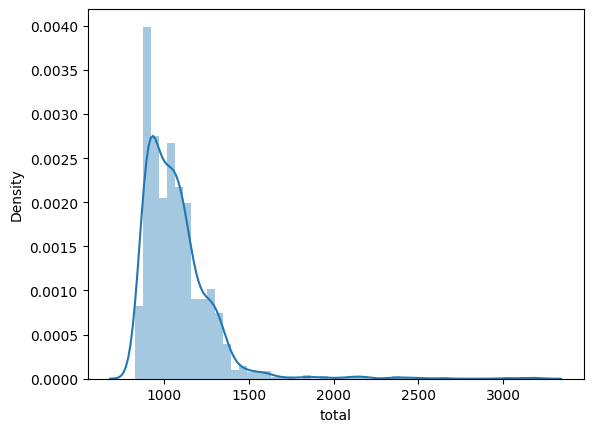

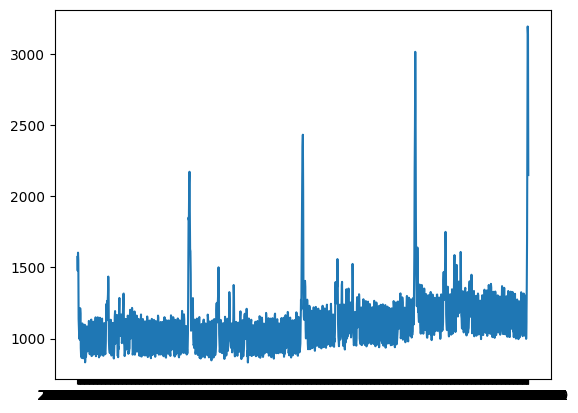

In [50]:
sns.distplot(df_plot_main['total'])
plt.show()
plt.plot(df_plot_main['total'])
plt.show()

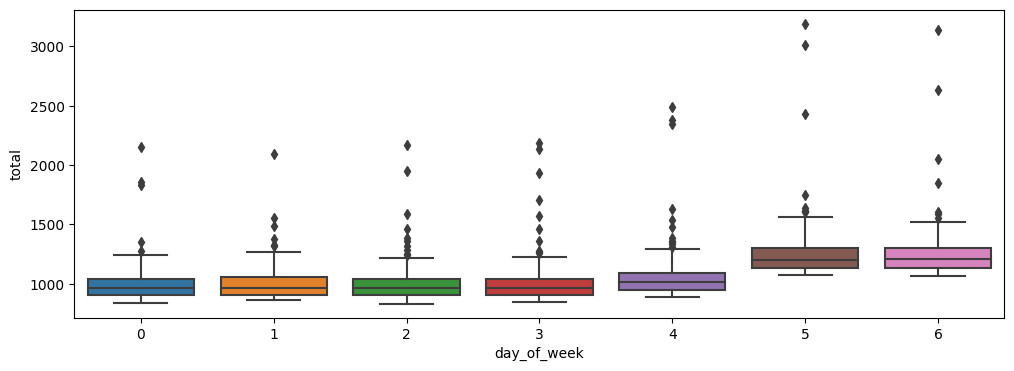

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(data =df_plot_main , x='day_of_week',y='total',ax=ax)
plt.show()

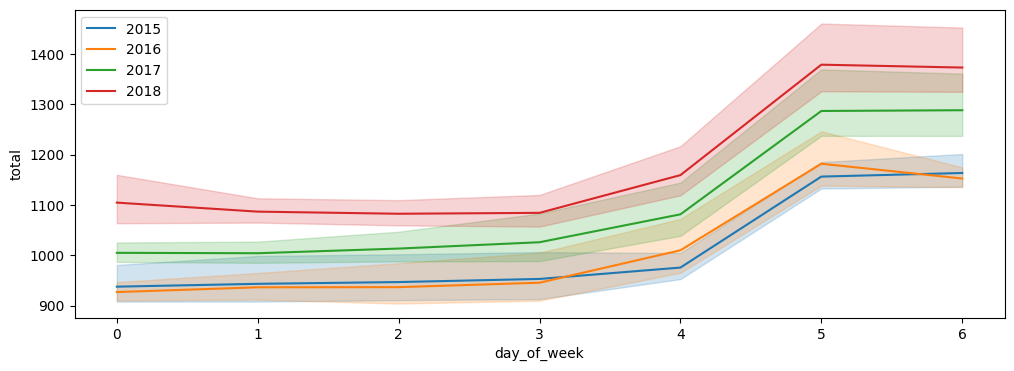

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
df_plot = pd.DataFrame()
for i in year:
    df_plot = df_plot_main.where(df_plot_main['year'] == i).dropna()
    sns.lineplot(data = df_plot,x='day_of_week',y='total',ax=ax,label=i,legend='auto')
plt.show()

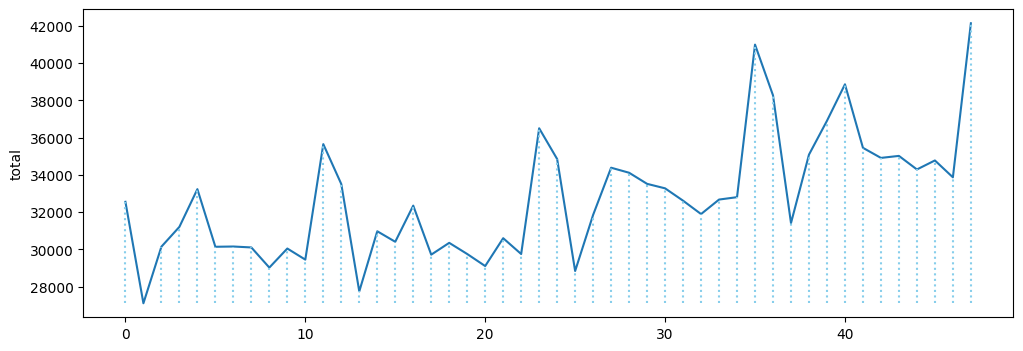

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
df_plot = df_plot_main.drop(columns=['day_of_week','num_week','day_of_year','day_of_month'])
df_plot = df_plot.groupby(['month','year']).sum()
df_plot = df_plot.reset_index()
df_plot = df_plot.sort_values(by=['year','month'])
df_plot = df_plot.reset_index(drop=True)
sns.lineplot(data =df_plot , x=df_plot.index,y='total',ax=ax)
for x, y in zip(df_plot.index, df_plot['total']):
    plt.plot([x, x], [min(df_plot['total']), y], linestyle=':',color='skyblue')
plt.show()

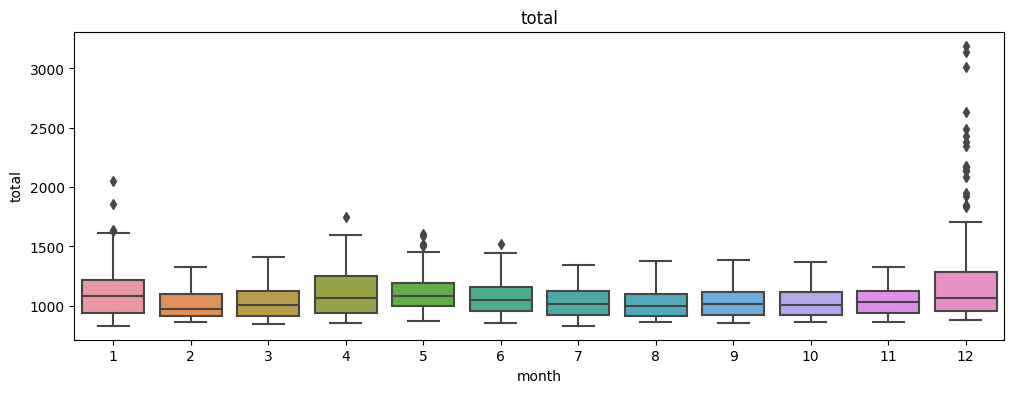

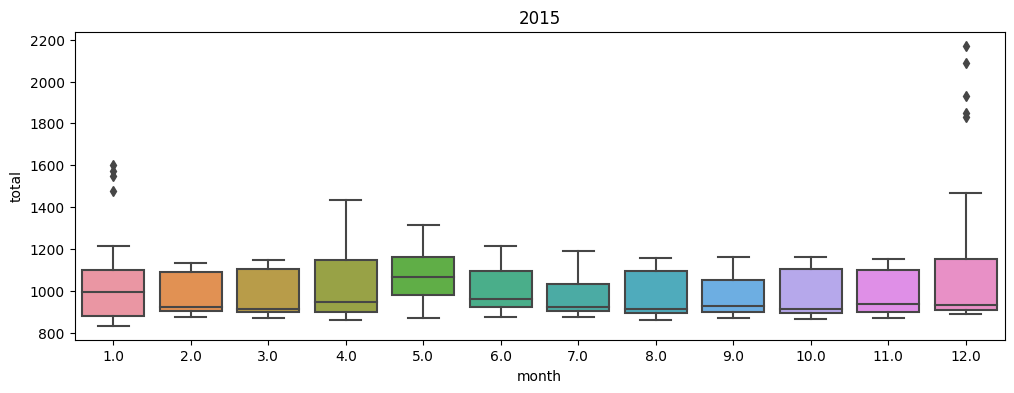

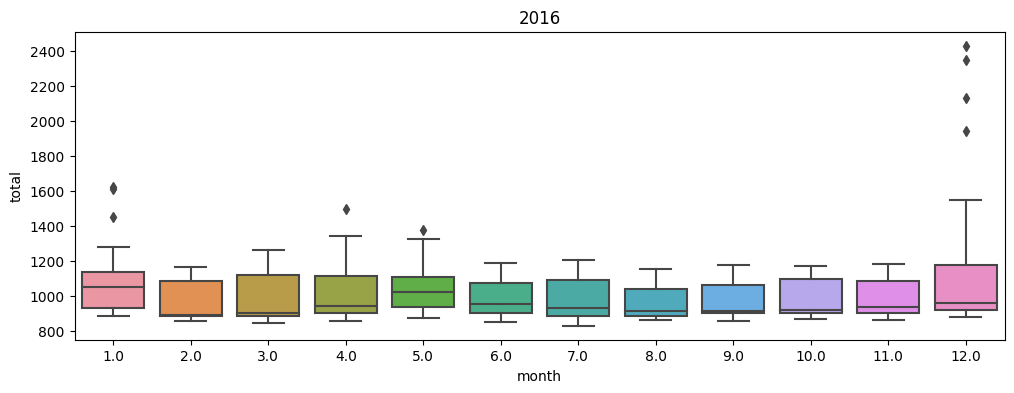

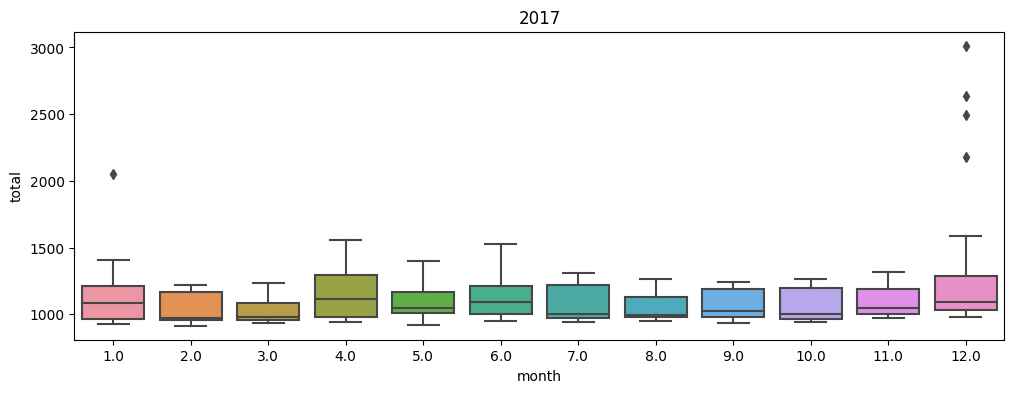

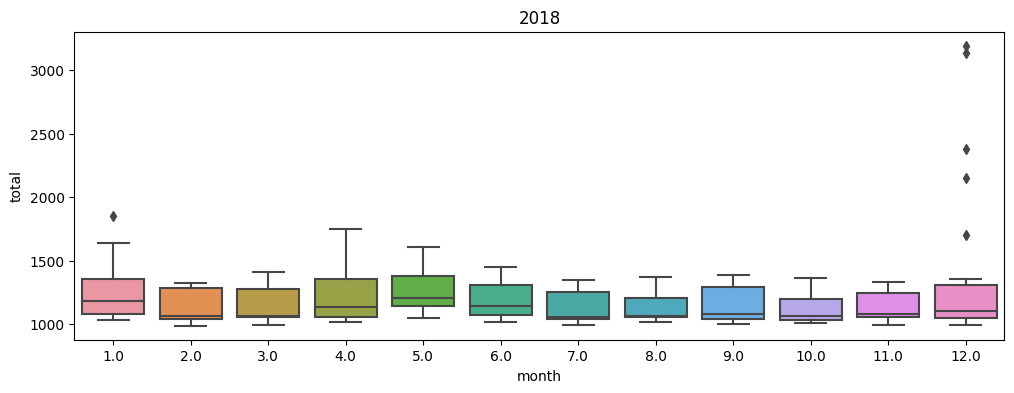

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(data=df_plot_main,x='month',y='total',ax=ax)
plt.title('total')
plt.show()
for i in year:
    fig, ax = plt.subplots()
    fig.set_size_inches((12,4))
    df_plot = df_plot_main.where(df_plot_main['year'] == i).dropna()
    sns.boxplot(data=df_plot,x='month',y='total',ax=ax)
    plt.title(i)
    plt.show()

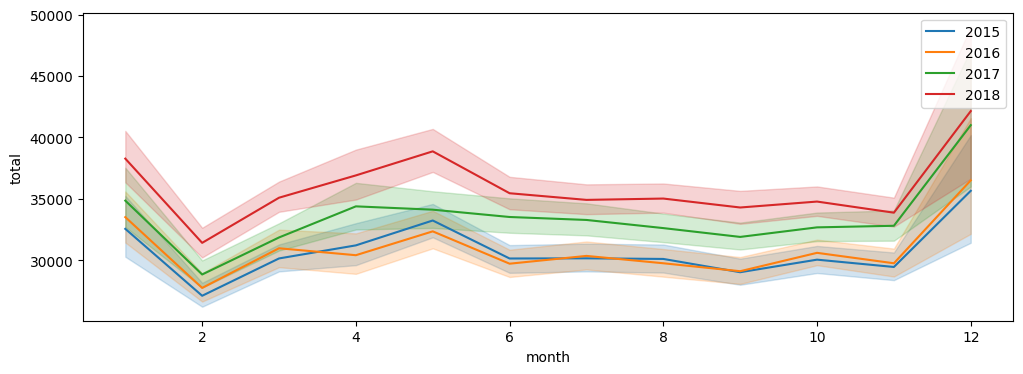

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
for i in year:
    df_plot = df_plot_main.where(df_plot_main['year'] == i).dropna()
    sns.lineplot(data = df_plot,x='month',y='total',ax=ax,label=i,legend='auto',estimator='sum')
plt.show()

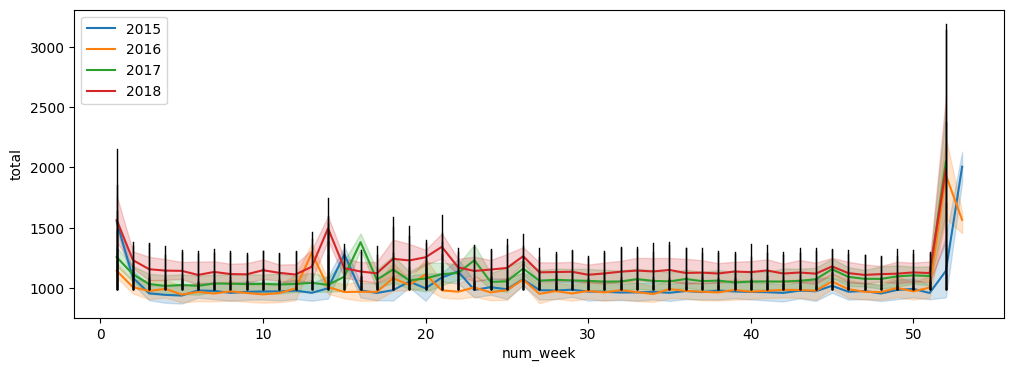

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
for i in year:
    #df_plot = df_plot_main[ (df_plot_main['month']>=2) & (df_plot_main['month']<=5) ]
    df_plot = df_plot_main.where(df_plot_main['year'] == i).dropna()
    sns.lineplot(data = df_plot,x='num_week',y='total',ax=ax,label=i,legend='auto')
#for i in df_plot_main.where(df_plot_main['day_of_month'] == 1).dropna()['day_of_year']:
    #plt.axvline(x=i, color='black', linestyle='-')
for x, y in zip(df_plot['num_week'], df_plot['total']):
    plt.plot([x, x], [min(df_plot['total']), y], 'k-', lw=1)
plt.show()

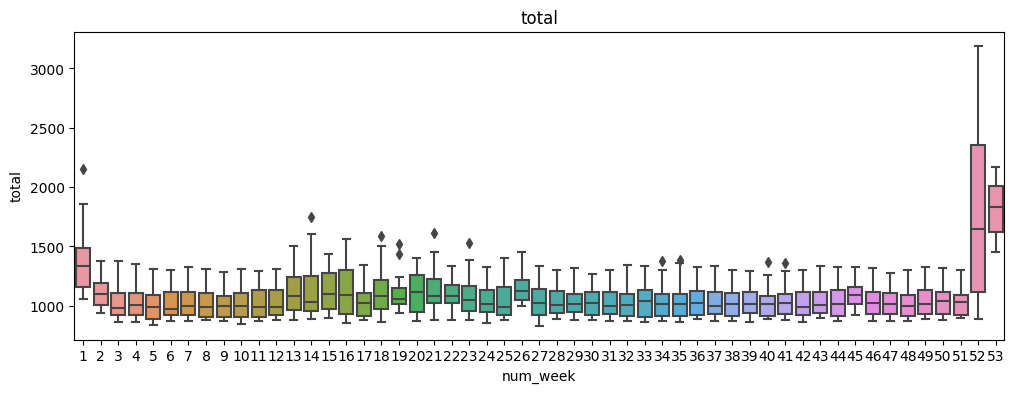

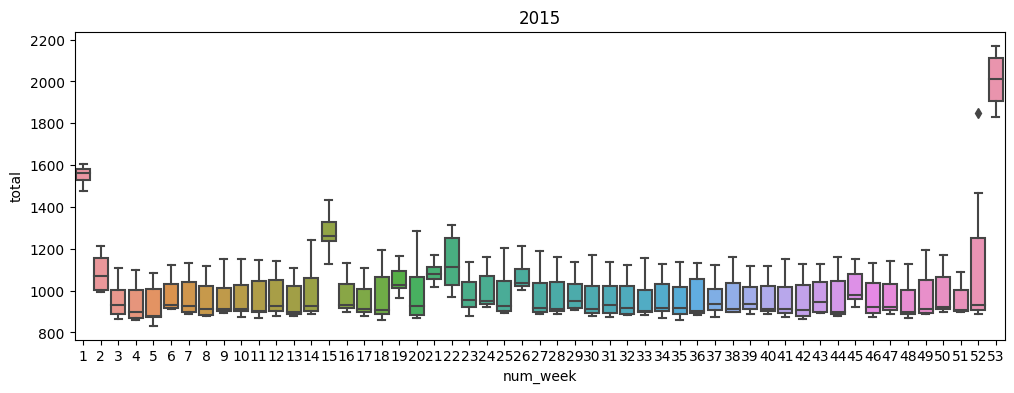

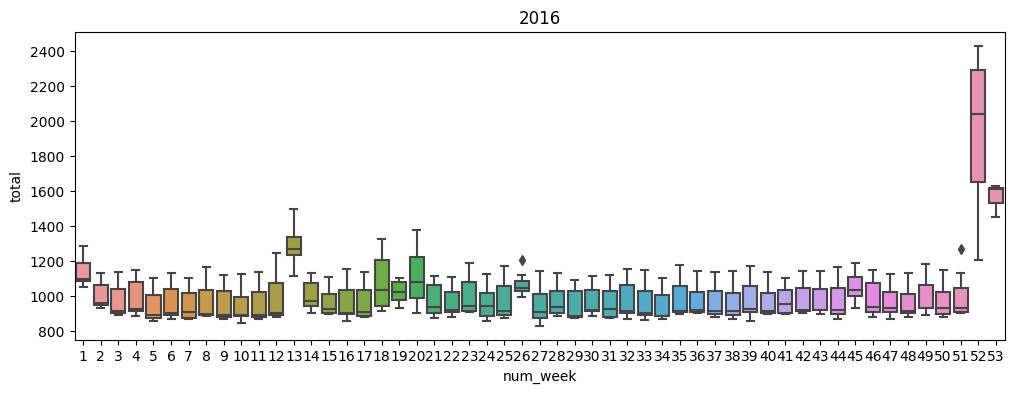

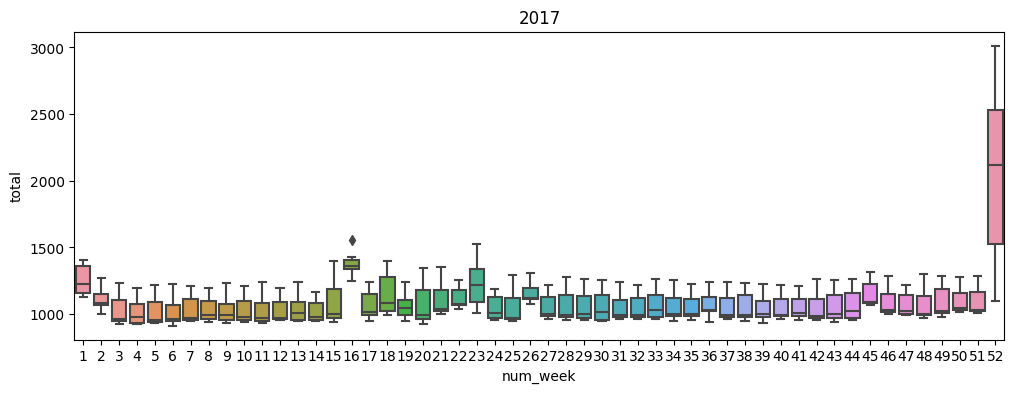

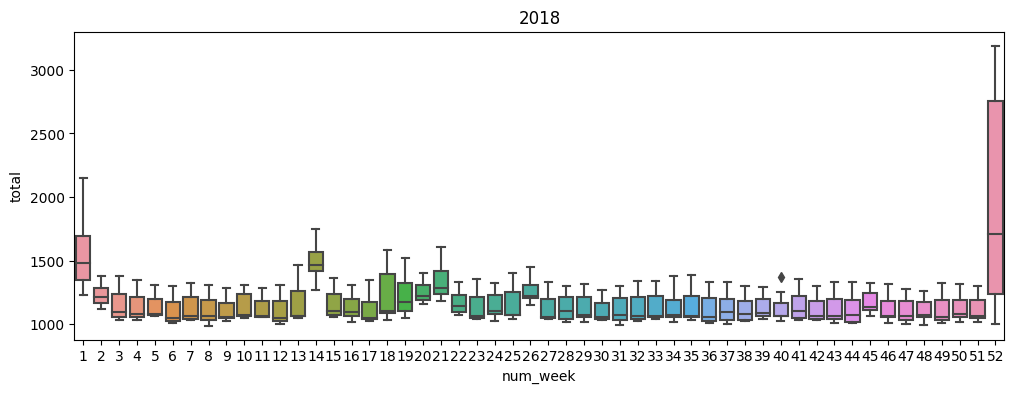

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(data =df_plot_main , x='num_week',y='total',ax=ax)
plt.title('total')
plt.show()
for i in year:
    fig, ax = plt.subplots()
    fig.set_size_inches((12,4))
    df_plot = df_plot_main.where(df_plot_main['year'] == i).dropna()
    df_plot['num_week'] = df_plot['num_week'].astype('int')
    sns.boxplot(data=df_plot,x='num_week',y='total',ax=ax)
    plt.title(i)
    plt.show()

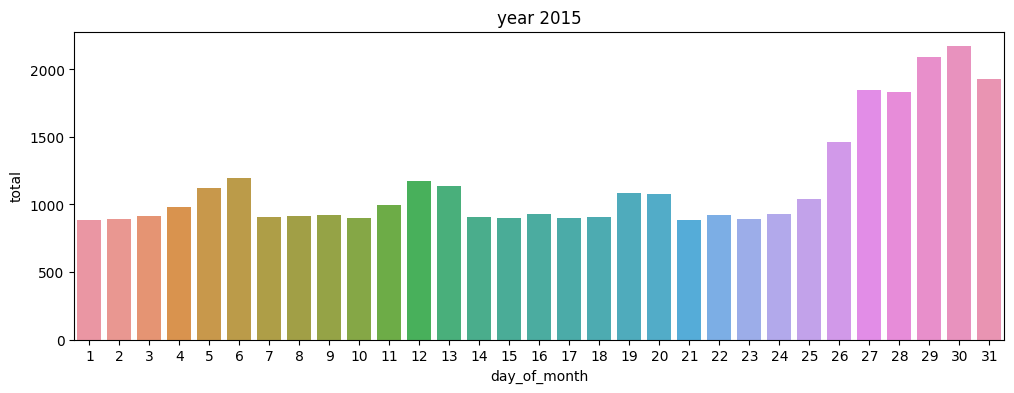

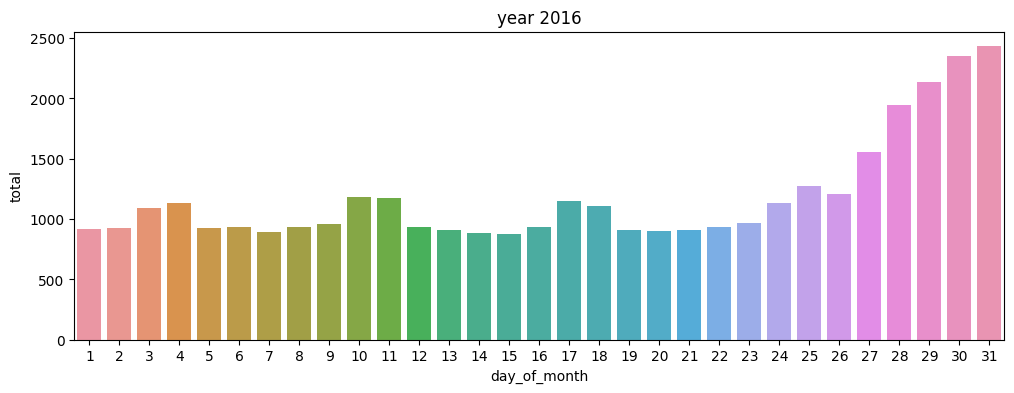

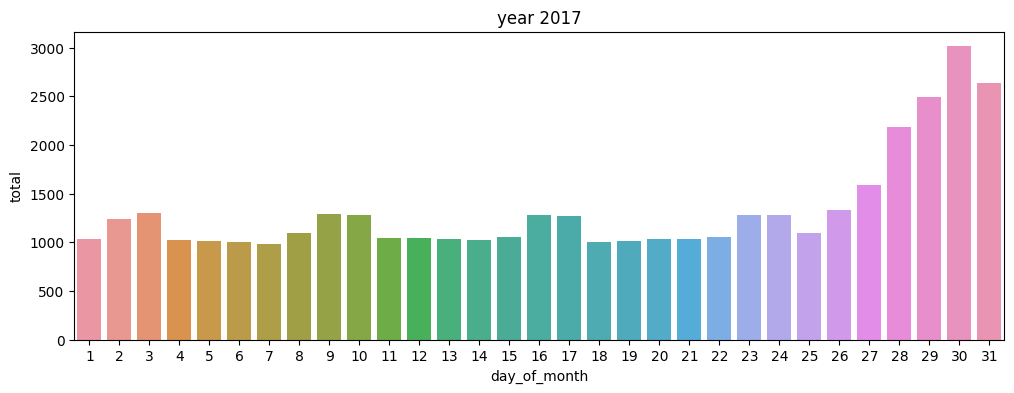

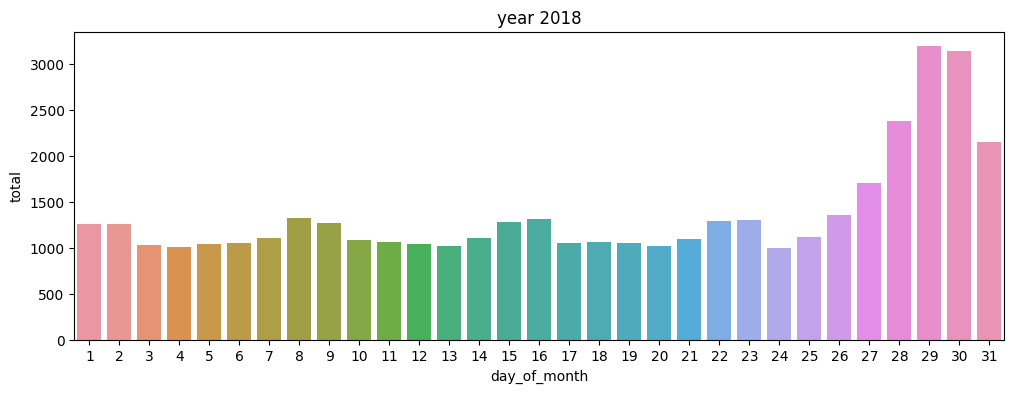

In [58]:
for i in year:
    fig, ax = plt.subplots()
    fig.set_size_inches((12,4))
    df_plot = pd.DataFrame()
    df_plot = df_plot_main[ (df_plot_main['month']==12)]
    df_plot = df_plot.where(df_plot['year'] == i).dropna()
    df_plot['day_of_month'] = df_plot['day_of_month'].astype('int')
    sns.barplot(data = df_plot,x='day_of_month',y='total',ax=ax,label=i)
    plt.title('year '+str(i))
    plt.show()
#for i in df_plot_main.where(df_plot_main['day_of_month'] == 1).dropna()['day_of_year']:
    #plt.axvline(x=i, color='black', linestyle='-')
#for x, y in zip(df_plot['num_week'], df_plot['total']):
    #plt.plot([x, x], [min(df_plot['total']), y], 'k-', lw=1)

In [59]:
easterday = ['2015-04-05','2016-03-27','2017-04-16','2018-04-01']

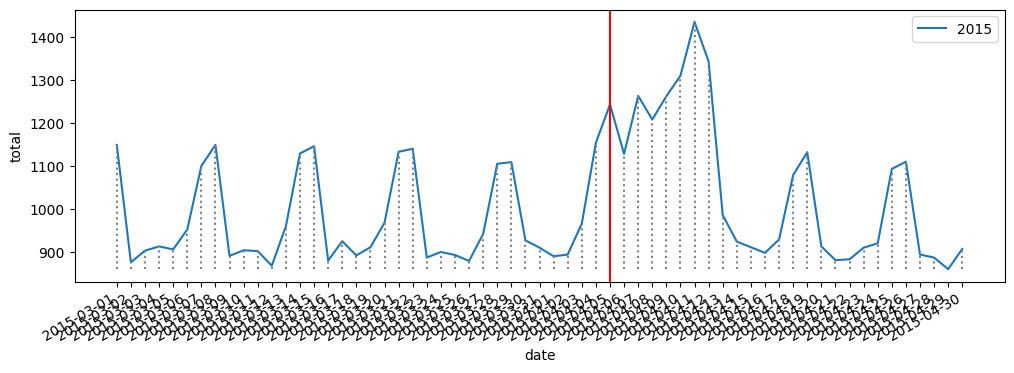

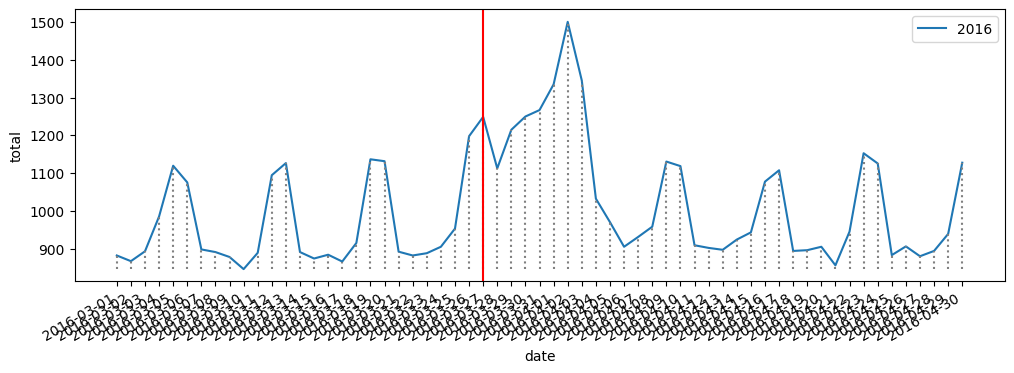

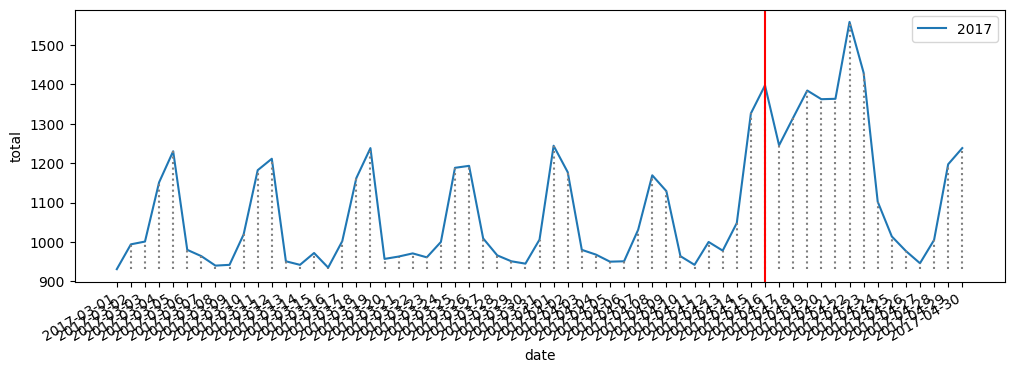

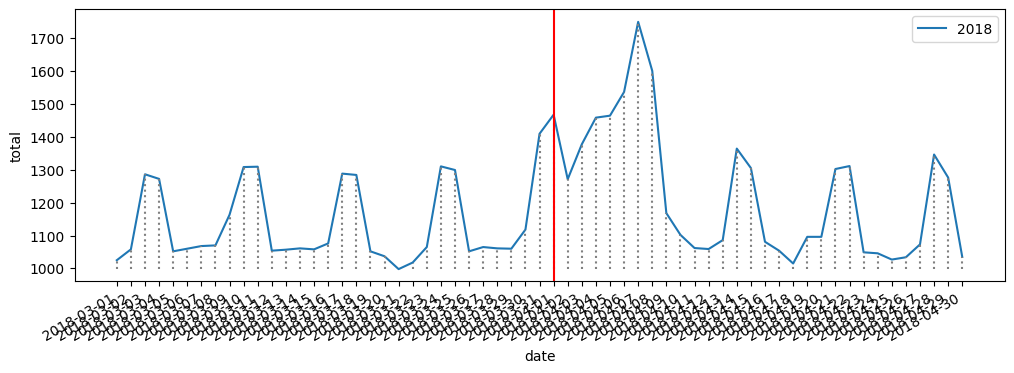

In [60]:
for i in year:
    fig, ax = plt.subplots()
    fig.set_size_inches((12,4))
    df_plot = df_plot_main.where(df_plot_main['year'] == i).dropna()
    df_plot = df_plot.where((df_plot['month']>2)&(df_plot['month']<5)).dropna()
    sns.lineplot(data = df_plot,x='date',y='total',ax=ax,label=i,legend='auto')
    fig.autofmt_xdate()
    for k,l in zip(df_plot.index.values,df_plot['total'].values):
        plt.vlines(x = k,ymax=l,ymin=np.min(df_plot['total'].values), color = 'gray',linestyles='dotted')
    plt.axvline(x=easterday[year.index(i)],color='red')
    plt.show()

### Kaggle Sticker - Engineering

In [61]:
only_sticker.columns.values

array(['Finland_KaggleMart_Kaggle Sticker',
       'Finland_KaggleRama_Kaggle Sticker',
       'Norway_KaggleMart_Kaggle Sticker',
       'Norway_KaggleRama_Kaggle Sticker',
       'Sweden_KaggleMart_Kaggle Sticker',
       'Sweden_KaggleRama_Kaggle Sticker', 'total'], dtype=object)

In [62]:
only_sticker['year'] = pd.DatetimeIndex(only_sticker.index).year
only_sticker['month'] = pd.DatetimeIndex(only_sticker.index).month
only_sticker['day_of_week'] = pd.DatetimeIndex(only_sticker.index).weekday
only_sticker['num_week'] = pd.DatetimeIndex(only_sticker.index).weekofyear

only_sticker['is_weekend'] = only_sticker['day_of_week'] > 4
only_sticker['is_weekend'] = only_sticker['is_weekend']*1
only_sticker['is_ny'] = (only_sticker['num_week'] == 52) | (only_sticker['num_week'] == 1)
only_sticker['is_ny'] = only_sticker['is_ny']*1
only_sticker['easterday'] = only_sticker.index.isin(easterday)
only_sticker['easterday'] = only_sticker['easterday']*1

week_after_easter = []
for i in range(0,1461):
    if only_sticker.iloc[i]['year'] == 2015 and  only_sticker.iloc[i]['num_week'] == 15:
        week_after_easter.append(1)
    elif only_sticker.iloc[i]['year'] == 2016 and  only_sticker.iloc[i]['num_week'] == 13:
        week_after_easter.append(1)
    elif only_sticker.iloc[i]['year'] == 2017 and  only_sticker.iloc[i]['num_week'] == 16:
        week_after_easter.append(1)
    elif only_sticker.iloc[i]['year'] == 2018 and  only_sticker.iloc[i]['num_week'] == 14:
        week_after_easter.append(1)
    else:
        week_after_easter.append(0)

only_sticker['week_after_easter'] = np.array(week_after_easter)


In [117]:
only_sticker.drop(columns='total',inplace=True)
only_sticker

Finland_KaggleMart_Kaggle Sticker  \
date                                            
2015-01-01                                146   
2015-01-02                                127   
2015-01-03                                141   
2015-01-04                                125   
2015-01-05                                102   
...                                       ...   
2018-12-27                                177   
2018-12-28                                223   
2018-12-29                                296   
2018-12-30                                326   
2018-12-31                                238   

            Finland_KaggleRama_Kaggle Sticker  \
date                                            
2015-01-01                                283   
2015-01-02                                249   
2015-01-03                                265   
2015-01-04                                245   
2015-01-05                                187   
...                                       ...   
2018-12-27                                308   
2018-12-28                                431   
2018-12-29                                559   
2018-12-30                                554   
2018-12-31                                360   

            Norway_KaggleMart_Kaggle Sticker  \
date                                           
2015-01-01                               250   
2015-01-02                               237   
2015-01-03                               254   
2015-01-04                               255   
2015-01-05                               184   
...                                      ...   
2018-12-27                               270   
2018-12-28                               361   
2018-12-29                               518   
2018-12-30                               500   
2018-12-31                               351   

            Norway_KaggleRama_Kaggle Sticker  \
date                                           
2015-01-01                               395   
2015-01-02                               415   
2015-01-03                               451   
2015-01-04                               455   
2015-01-05                               310   
...                                      ...   
2018-12-27                               436   
2018-12-28                               662   
2018-12-29                               874   
2018-12-30                               833   
2018-12-31                               561   

            Sweden_KaggleMart_Kaggle Sticker  \
date                                           
2015-01-01                               175   
2015-01-02                               155   
2015-01-03                               173   
2015-01-04                               169   
2015-01-05                               127   
...                                      ...   
2018-12-27                               196   
2018-12-28                               260   
2018-12-29                               348   
2018-12-30                               336   
2018-12-31                               250   

            Sweden_KaggleRama_Kaggle Sticker  year  month  day_of_week  \
date                                                                     
2015-01-01                               324  2015      1            3   
2015-01-02                               293  2015      1            4   
2015-01-03                               319  2015      1            5   
2015-01-04                               300  2015      1            6   
2015-01-05                               227  2015      1            0   
...                                      ...   ...    ...          ...   
2018-12-27                               319  2018     12            3   
2018-12-28                               441  2018     12            4   
2018-12-29                               596  2018     12            5   
2018-12-30                               587  2

# Analysis

Recap before modeling:
* There is no difference among countries or stores.
* Only the 'product' affects 'num_sold'.
* Therefore, we should analyze each product separately.
* There is a weekend effect on days 5 and 6, with Saturday and Sunday usually being the weekend.
* There is a holiday effect on weeks 1, 13, 14, 15, 16, and 52.
  * Week 1 and 52 are likely related to Christmas and New Year.
  * Weeks 13, 14, 15, and 16 are likely related to Easter Day, as the date of Easter varies each year.
* For Easter Day, the day of Easter will be calculated for the years 2015-2018, which were:
  * 2015: April 5th
  * 2016: March 27th
  * 2017: April 16th
  * 2018: April 1st
* The week after Easter Day is affected by the Easter Day.

In [ ]:
# change format date to time format
only_mug.reset_index(inplace=True)
only_mug['date'] = pd.to_datetime(only_mug['date'])
only_mug.set_index('date',inplace=True)

only_hat.reset_index(inplace=True)
only_hat['date'] = pd.to_datetime(only_hat['date'])
only_hat.set_index('date',inplace=True)

only_sticker.reset_index(inplace=True)
only_sticker['date'] = pd.to_datetime(only_sticker['date'])
only_sticker.set_index('date',inplace=True)

Before creating the model, we will create features for the test set as this is a forecasting model that requires features from the next year for forecasting.

In [130]:
#Include Easter Day for the year 2019. '2019-04-21'
#easterday.append('2019-04-21')
easterday

['2015-04-05', '2016-03-27', '2017-04-16', '2018-04-01', '2019-04-21']

In [136]:
# create feature of test.csv
new_test = pd.DataFrame()
new_test['date'] = test['date'].unique()
new_test['date'] = pd.to_datetime(new_test['date'])
new_test.set_index('date',inplace=True)
new_test['year'] = pd.DatetimeIndex(new_test.index).year
new_test['month'] = pd.DatetimeIndex(new_test.index).month
new_test['day_of_week'] = pd.DatetimeIndex(new_test.index).weekday
new_test['num_week'] = pd.DatetimeIndex(new_test.index).weekofyear

new_test['is_weekend'] = new_test['day_of_week'] > 4
new_test['is_weekend'] = new_test['is_weekend']*1
new_test['is_ny'] = (new_test['num_week'] == 52) | (new_test['num_week'] == 1)
new_test['is_ny'] = new_test['is_ny']*1
new_test['easterday'] = new_test.index.isin(easterday)
new_test['easterday'] = new_test['easterday']*1

week_after_easter = []
for i in range(0,len(new_test)):
    if new_test.iloc[i]['num_week'] == 17:
        week_after_easter.append(1)
    else:
        week_after_easter.append(0)

new_test['week_after_easter'] = np.array(week_after_easter)

# seperate to each product
new_test_mug = pd.DataFrame(new_test)
new_test_hat = pd.DataFrame(new_test)
new_test_sticker = pd.DataFrame(new_test)


In [122]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [210]:
def analysis(only_product,new_test_product,model):
    features = only_product.columns.values[6:]
    target = only_product.columns.values[0:6]

    result= pd.DataFrame()
    result['date'] = new_test_product.index.values
    result['date'] = pd.to_datetime(result['date'])
    result.set_index('date',inplace=True)

    for i in target:
        X_train, X_test, y_train, y_test = train_test_split(only_product[features], only_product[i], random_state=42, test_size=0.2)
        model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],verbose=100)
        result[i] = model.predict(new_test_product)
    
    return result

In [ ]:
# using xgb regressor for forecasting
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

#seperate model for each product that we found they have different characteristic
result_mug = analysis(only_mug,new_test_mug,model)
result_hat = analysis(only_hat,new_test_hat,model)
result_sticker = analysis(only_sticker,new_test_sticker,model)


<function matplotlib.pyplot.show(close=None, block=None)>

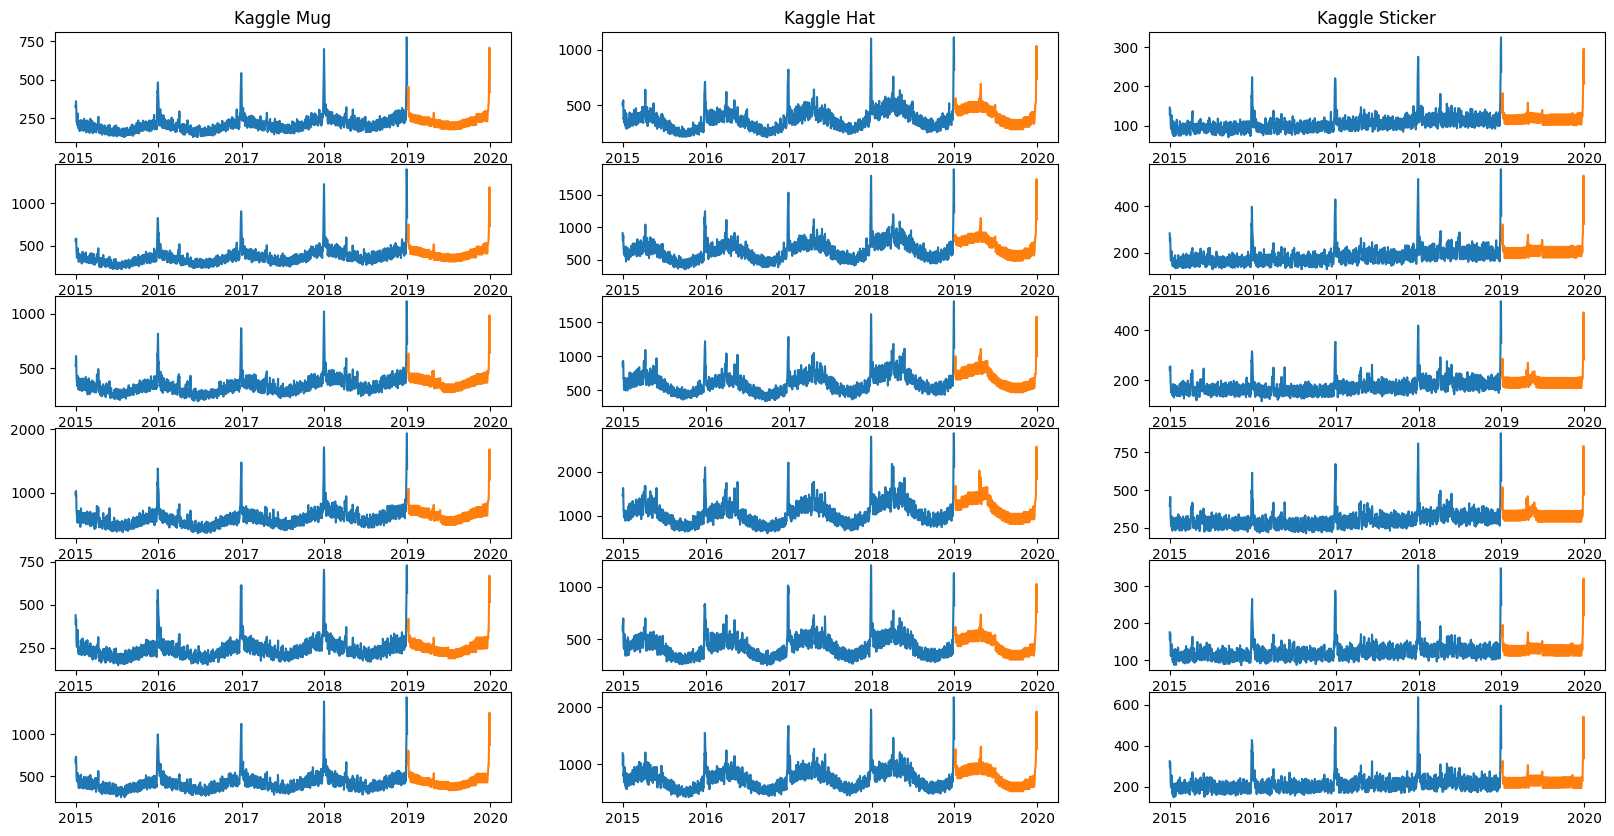

In [234]:
# Check the result
result = pd.DataFrame(result_mug)
result[result_hat.columns.values] = result_hat[result_hat.columns.values]
result[result_sticker.columns.values] = result_sticker[result_sticker.columns.values]

ori = pd.DataFrame(only_mug[only_mug.columns.values[0:6]])
ori[only_hat.columns.values[0:6]] = only_hat[only_hat.columns.values[0:6]]
ori[only_sticker.columns.values[0:6]] = only_sticker[only_sticker.columns.values[0:6]]

fix, ax =plt.subplots(6,3,figsize=(20, 10))
n = 0
for c in range(3):
    for r in range(6):
        ax[r,c].plot(ori[ori.columns.values[n]])
        ax[r,c].plot(result[result.columns.values[n]])
        n += 1
    
ax[0,0].title.set_text('Kaggle Mug')
ax[0,1].title.set_text('Kaggle Hat')
ax[0,2].title.set_text('Kaggle Sticker')
plt.show

### Submid File

In [294]:
realsort_target = []
for i in test.head(18).index.values:
    realsort_target.append(test.iloc[i][2:][0]+'_'+test.iloc[i][2:][1]+'_'+test.iloc[i][2:][2])

result_realsortcolumn = pd.DataFrame()
for i in realsort_target:
    result_realsortcolumn[i] = result[i]

result_submid = []
for i in range(len(result_realsortcolumn)):
    for j in range(len(realsort_target)):
        result_submid.append(result_realsortcolumn.iloc[i][j])

In [304]:
submid = pd.DataFrame(test['row_id'])
submid['num_sold'] = result_submid
submid.set_index('row_id',inplace= True)
submid.to_csv('submission_jan2022.csv')